<a href="https://colab.research.google.com/github/sbs23003/CA-Contstruction-Industry/blob/main/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ireland Construction Sector

In [2]:
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00


In [3]:
!pip install pandas sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import ruptures as rpt

## Importing the data

In [8]:
API_TOKEN = 'ad005721228c69020f7e463880e587ea18c861f6'


# HOUSE PRICE INDEX
df_housePriceIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=690defcf873cbbcaeed76b709a38d93635718106&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2007-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&PURCHASE=%5BTOTAL%5D&UNIT=%5BI10_A_AVG%5D&format=csv&dataset=PRC_HPI_A')
df_housePriceIndex.rename(columns={'PRC_HPI_A.L7D9AO04A0.Y.IE': 'House Price Index IRELAND',
                                   'PRC_HPI_A.L7D9AO04A0.Y.SE': 'House Price Index SWEDEN',
                                   'PRC_HPI_A.L7D9AO04A0.Y.DK': 'House Price Index DENMARK'}, inplace=True)
# RENTS INDEX
df_rentalIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=3acf191761e2c11acf4f16e25d7070ab791d110b&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2007-08-01&to=2022-01-01&COICOP=%5BCP041%5D&FREQ=%5BA%5D&GEO=%5BIE%2CDK%2CSE%5D&UNIT=%5BINX_A_AVG%5D&format=csv&dataset=PRC_HICP_AIND')
df_rentalIndex.rename(columns={'PRC_HICP_AIND.3073C32B86.Y.IE': 'Rental Index IRELAND',
                                   'PRC_HICP_AIND.3073C32B86.Y.SE': 'Rental Index SWEDEN',
                                   'PRC_HICP_AIND.3073C32B86.Y.DK': 'Rental Index DENMARK'}, inplace=True)

# BUILIDING PERMITS 
df_buildingPermits = pd.read_csv(
  'https://www.econdb.com/api/series/?token=b98aad1e843d9ea5ec17dc6dd39ae75ea0282503&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2010-01-01&to=2022-01-01&CPA2_1=%5BCPA_F41001_41002%2CCPA_F41002%2CCPA_F41002_X_410023%2CCPA_F410023%2CCPA_F410011%2CCPA_F410014%2CCPA_F41001%2CCPA_F41001_X_410014%2CCPA_F410012_410013%5D&FREQ=%5BA%5D&GEO=%5BDK%2CIE%2CSE%5D&INDIC_BT=%5BPNUM%5D&S_ADJ=%5BNSA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COBP_A')
df_buildingPermits.rename(columns={'STS_COBP_A.P3D0135A9900035.Y.IE': 'Residential Permits IRELAND', 'STS_COBP_A.P3D0135A9932B3B.Y.IE': 'Residential Permits % IRELAND', 'STS_COBP_A.P3D0235A9932B3B.Y.IE': '1 dwelling Permits IRELAND', 'STS_COBP_A.P3D0335A9932B3B.Y.IE': '2+ dwelling Permits IRELAND', 
                                   'STS_COBP_A.P3D0135A9900035.Y.SE': 'Residential Permits SWEDEN', 'STS_COBP_A.P3D0135A9932B3B.Y.SE': 'Residential Permits % SWEDEN', 'STS_COBP_A.P3D0235A9932B3B.Y.SE': '1 dwelling Permits SWEDEN', 'STS_COBP_A.P3D0335A9932B3B.Y.SE': '2+ dwelling Permits SWEDEN', 
                                   'STS_COBP_A.P3D0135A9900035.Y.DK': 'Residential Permits DENMARK', 'STS_COBP_A.P3D0135A9932B3B.Y.DK': 'Residential Permits % DENMARK', 'STS_COBP_A.P3D0235A9932B3B.Y.DK': '1 dwelling Permits DENMARK', 'STS_COBP_A.P3D0335A9932B3B.Y.DK': '2+ dwelling Permits DENMARK'}, inplace=True)

# NUMBER OF ENTERPRISES AND EMPLOYEES
df_enterprises = pd.read_csv(
	'https://www.econdb.com/api/series/?token=74cd5ad46ce82db55826b7d3b08f6b26c5f8a68f&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2009-01-01&to=2023-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&INDIC_SB=%5BV11110%2CV16130%5D&NACE_R2=%5BF%5D&format=csv&dataset=SBS_NA_CON_R2')
df_enterprises.rename(columns={'SBS_NA_CON_R2.357D80003E.Y.IE': 'Number of Companies IRELAND', 'SBS_NA_CON_R2.35AEC0003E.Y.IE': 'Number of Emplyees IRELAND', 
                               'SBS_NA_CON_R2.357D80003E.Y.SE': 'Number of Companies SWEDEN', 'SBS_NA_CON_R2.35AEC0003E.Y.SE': 'Number of Emplyees SWEDEN', 
                               'SBS_NA_CON_R2.357D80003E.Y.DK': 'Number of Companies DENMARK', 'SBS_NA_CON_R2.35AEC0003E.Y.DK': 'Number of Emplyees DENMARK'}, inplace=True)

# CONSTRUCTION COST INDEX
df_contructionCostIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=a24930c112c9f08032dd2962a680be649c5c8e74&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2009-01-01&to=2022-01-01&GEO=%5BIE%2CSE%2CDK%5D&INDIC_BT=%5BCSTI%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COPI_A')
df_contructionCostIndex.rename(columns={'STS_COPI_A.35AA432B3B.Y.IE': 'Construction cost index IRELAND', 
                                        'STS_COPI_A.35AA432B3B.Y.SE': 'Construction cost index SWEDEN', 
                                        'STS_COPI_A.35AA432B3B.Y.DK': 'Construction cost index DENMARK'}, inplace=True)


# CONSTRUCTION PRODUCTION VOLUME 
df_productionVolume = pd.read_csv(
	'https://www.econdb.com/api/series/?token=40f0399619a27af5ad3afba304da54f6dda7ee5b&page=1&FREQ=%5BA%5D&GEO=%5BDK%2CSE%2CIE%5D&INDIC_BT=%5BPROD%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&from=2009-01-01&h=TIME&to=2022-01-01&v=Geopolitical+entity+%28reporting%29&format=csv&dataset=STS_COPR_A')
df_productionVolume.rename(columns={'STS_COPR_A.0003E19F6E32B3B.Y.IE': 'Volume of Production IRELAND', 
                                    'STS_COPR_A.0003E19F6E32B3B.Y.SE': 'Volume of Production SWEDEN', 
                                    'STS_COPR_A.0003E19F6E32B3B.Y.DK': 'Volume of Production DENMARK'}, inplace=True)

# CONSTRUCTION WORK VOLUME
df_labour = pd.read_csv(
	'https://www.econdb.com/api/series/?token=2ec39fb4142bc7023af276e442c08fac7fed7f22&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2009-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&INDIC_BT=%5BHOWK%2CWAGE%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COLB_A')
df_labour.rename(columns={'STS_COLB_A.35A9119F6E32B3B.Y.IE': 'Labour Costs IRELAND', 'STS_COLB_A.35A9019F6E32B3B.Y.IE': 'Hours Worked IRELAND', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.SE': 'Labour Costs SWEDEN', 'STS_COLB_A.35A9019F6E32B3B.Y.SE': 'Hours Worked SWEDEN', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.DK': 'Labour Costs DENMARK', 'STS_COLB_A.35A9019F6E32B3B.Y.DK': 'Hours Worked DENMARK'}, inplace=True)

# POPULATION
df_population = pd.read_csv(
		'https://www.econdb.com/api/series/?token=56e2cd25e2c249580a2c6b924958b92be83f39b5&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2000-01-01&to=2022-01-01&AGE=%5BTOTAL%5D&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&SEX=%5BT%5D&UNIT=%5BNR%5D&format=csv&dataset=DEMO_PJAN')
df_population.rename(columns={'DEMO_PJAN.00AD30088C.Y.IE': 'Population IRELAND', 
                              'DEMO_PJAN.00AD30088C.Y.SE': 'Population SWEDEN', 
                              'DEMO_PJAN.00AD30088C.Y.DK': 'Population DENMARK'}, inplace=True)

# MIGRATION/IMMIGRATION
df_demography = pd.read_csv(
		'https://www.econdb.com/api/series/?token=5ad1830eba5e5df98e2c5baff21be3d120bfd320&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2010-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BDK%2CSE%2CIE%5D&INDIC_DE=%5BMIGT%2CCNMIGRAT%5D&format=csv&dataset=DEMO_GIND')
df_demography.rename(columns={'DEMO_GIND.1743F.Y.IE': 'Net Migration IRELAND', 'DEMO_GIND.GB66D.Y.IE': 'Sum Migration/Immigration IRELAND', 
                              'DEMO_GIND.1743F.Y.DK': 'Net Migration SWEDEN', 'DEMO_GIND.GB66D.Y.DK': 'Sum Migration/Immigration SWEDEN', 
                              'DEMO_GIND.1743F.Y.SE': 'Net Migration DENMARK', 'DEMO_GIND.GB66D.Y.SE': 'Sum Migration/Immigration DENMARK'}, inplace=True)

df_demography['Net Immigration IRELAND'] = df_demography['Sum Migration/Immigration IRELAND'] - df_demography['Net Migration IRELAND']
df_demography['Net Immigration SWEDEN'] = df_demography['Sum Migration/Immigration SWEDEN'] - df_demography['Net Migration SWEDEN']
df_demography['Net Immigration DENMARK'] = df_demography['Sum Migration/Immigration DENMARK'] - df_demography['Net Migration DENMARK']

#HOUSE SALES
df_houseSales = pd.read_csv(
		'https://www.econdb.com/api/series/?token=c2968eb909528dffe9c462d6fbaadd7b98eb607f&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2009-02-01&to=2022-10-01&PURCHASE=%5BTOTAL%2CDW_NEW%2CDW_EXST%5D&UNIT=%5BI15_Q%5D&GEO=%5BIE%2CDK%2CSE%5D&format=csv&dataset=PRC_HPI_Q')
df_houseSales.rename(columns={'PRC_HPI_Q.L7D9AO0463.Q.IE': 'Total Purchases IRELAND', 'PRC_HPI_Q.L7D9BO0463.Q.IE': 'Purchases of New Dwellings IRELAND', 'PRC_HPI_Q.L7D9CO0463.Q.IE': 'Purchases of Existing Dwellings IRELAND', 
                              'PRC_HPI_Q.L7D9AO0463.Q.SE': 'Total Purchases SWEDEN',  'PRC_HPI_Q.L7D9BO0463.Q.SE': 'Purchases of New Dwellings SWEDEN',  'PRC_HPI_Q.L7D9CO0463.Q.SE': 'Purchases of Existing Dwellings SWEDEN',
                              'PRC_HPI_Q.L7D9AO0463.Q.DK': 'Total Purchases DENMARK', 'PRC_HPI_Q.L7D9BO0463.Q.DK': 'Purchases of New Dwellings DENMARK', 'PRC_HPI_Q.L7D9CO0463.Q.DK': 'Purchases of Existing Dwellings DENMARK'}, inplace=True)

# ANUAL NET EARNING
df_netEarning = pd.read_csv('/content/earnings.csv', names=['Country', 'Date', 'Net Earnings'])


df = df_houseSales.copy()
# Convert 'date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'date' column
df['year'] = df['Date'].dt.year

# Group by 'year' and calculate the mean for other columns
df_grouped = df.groupby('year').mean().reset_index()

# Rename 'year' column to 'date'
df_grouped.rename(columns={'year': 'Date'}, inplace=True)

# Display the transformed data
df_houseSales = df_grouped

# GDP
df_GDP = pd.read_csv('/content/gdp.csv')


<ipython-input-8-446a55254f8a>:90: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('year').mean().reset_index()


# Part 1

In [9]:
df_GDP.columns

Index(['Indicator', 'Country', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

Aqui atentar para o caso da russia e de montenegro


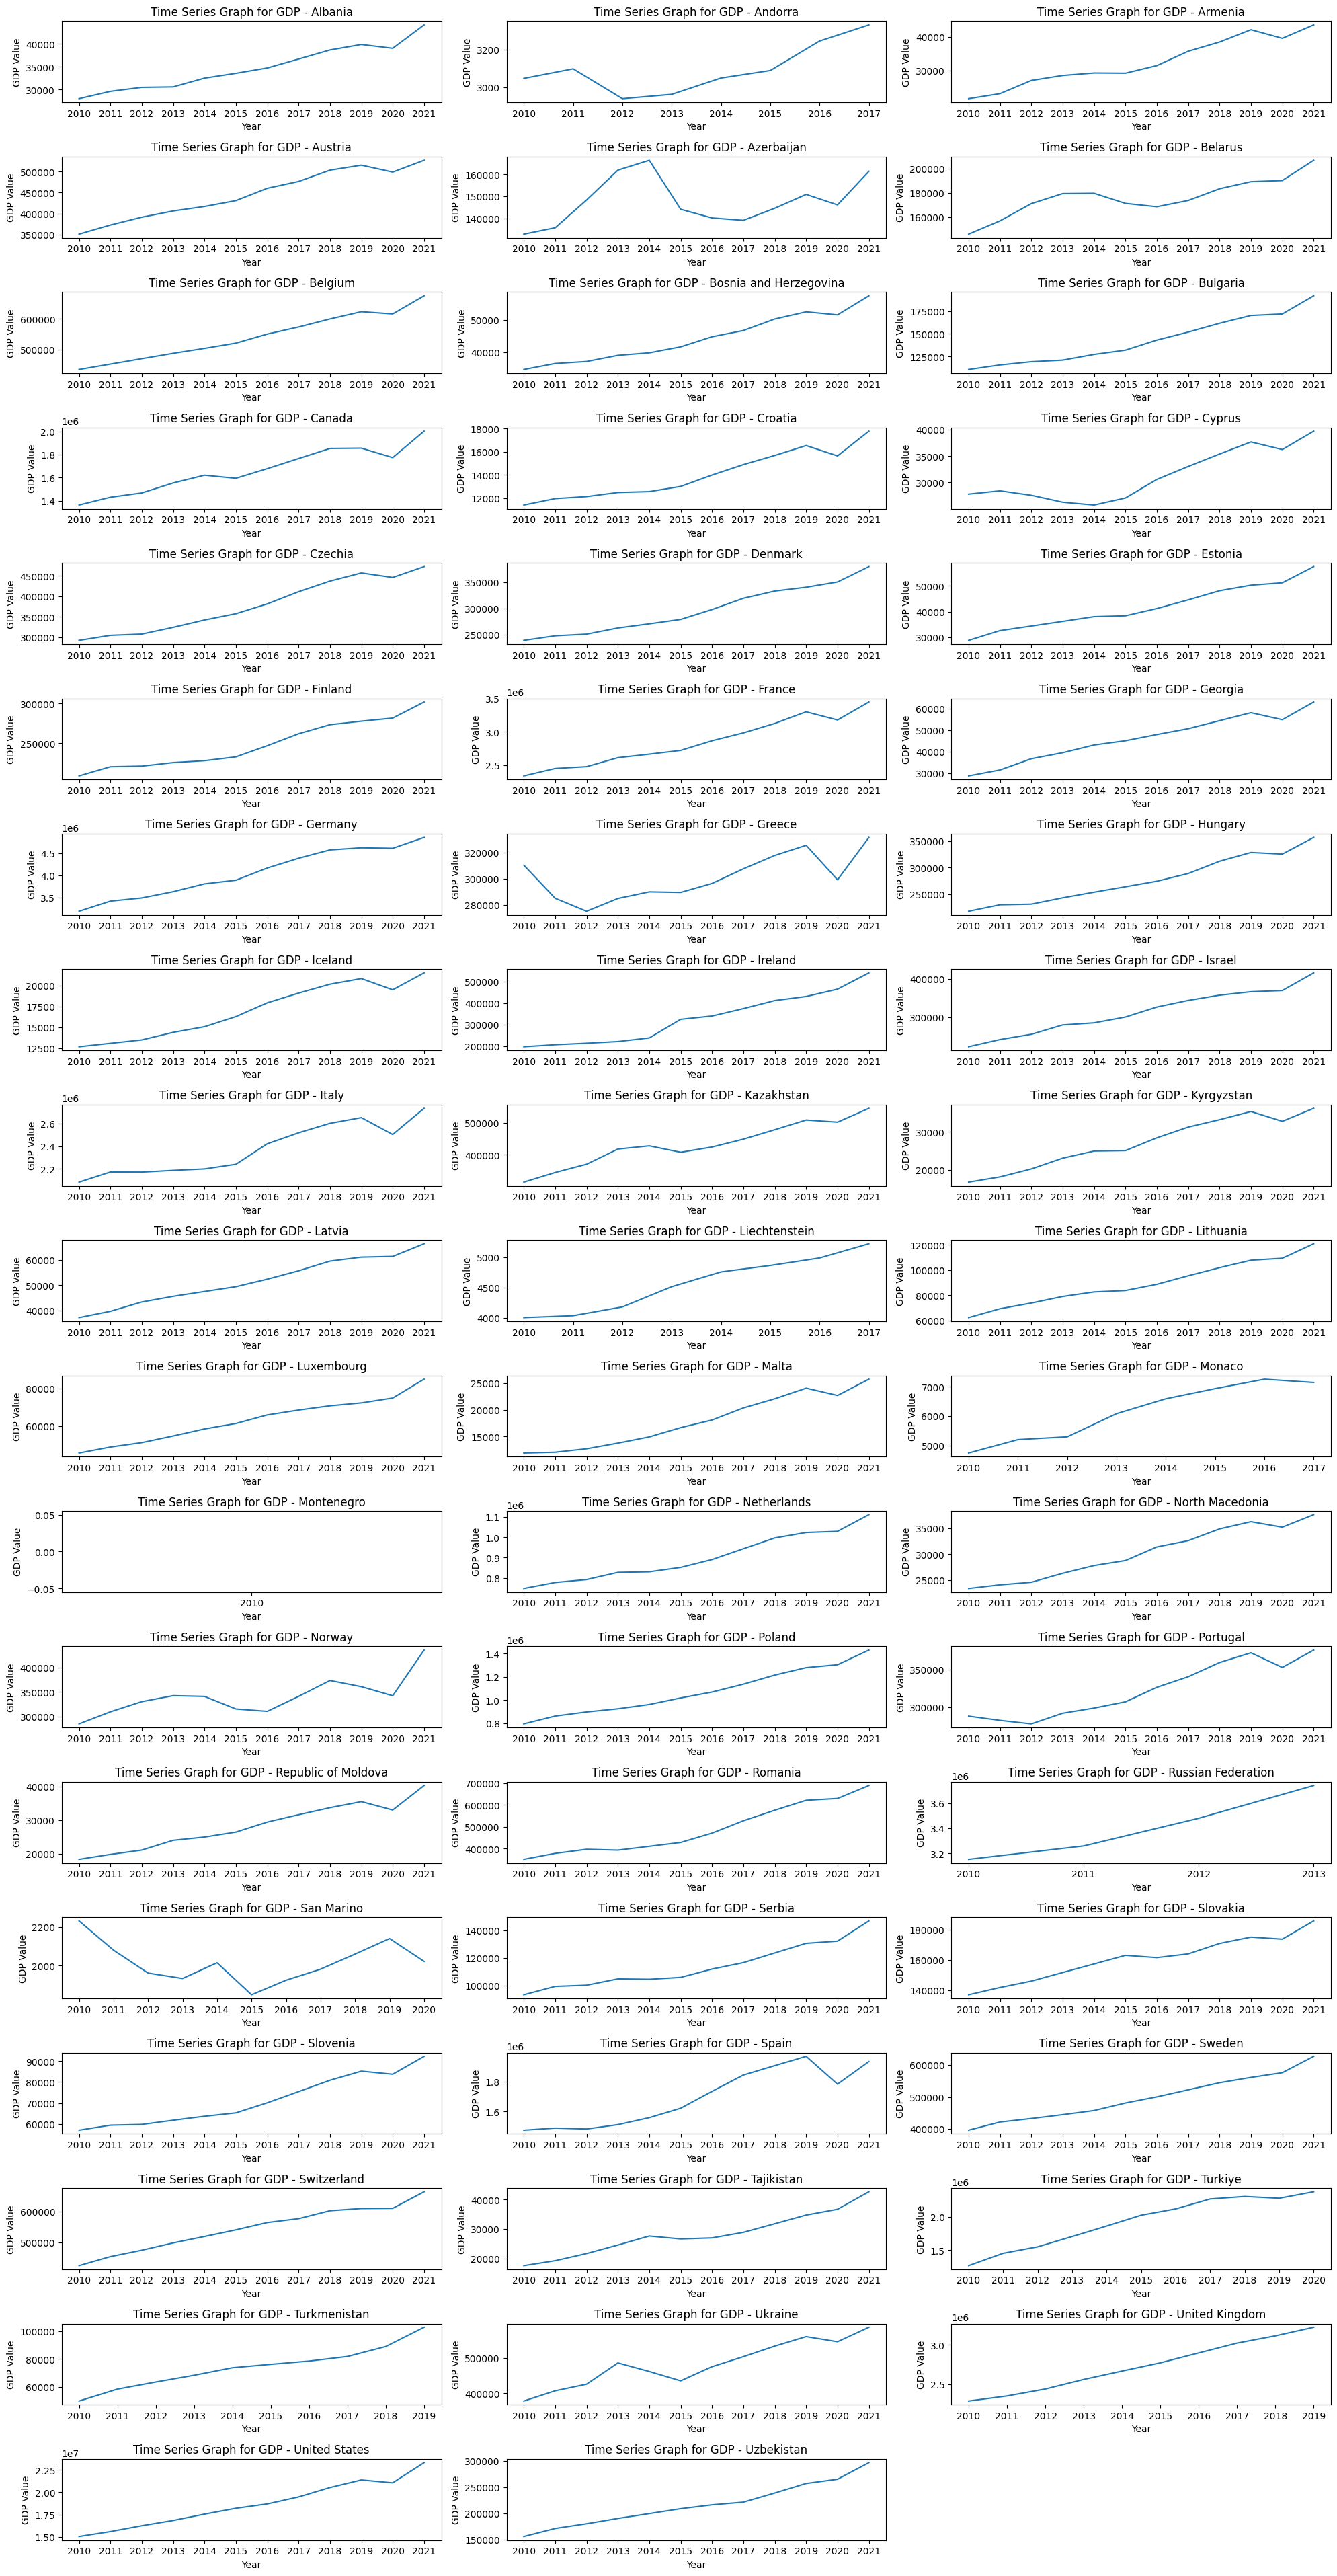

In [10]:
# Filter the data for GDP indicator
gdp_data = df_GDP[df_GDP['Indicator'] == 'GDP']

# Group the filtered data by country
country_data = gdp_data.groupby('Country')

# Set up the figure size and subplot grid
fig, axs = plt.subplots(len(country_data)//3 + len(country_data)%3, 3, figsize=(20,40))

# Iterate through the data and plot
for idx, (country, data) in enumerate(country_data):
    ax = axs[idx // 3, idx % 3]
    ax.plot(data.columns[2:], data.iloc[:, 2:].values.flatten())
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP Value')
    ax.set_title(f'Time Series Graph for GDP - {country}')

# Delete any unused subplots
for idx in range(len(country_data), len(axs.flatten())):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()


Checking For Missing Values

In [11]:
def visualize_missing_data(df):
    # Create a boolean dataframe where True means a missing value and False means a non-missing value.
    missing_data = df.isnull()

    print('Missing Values:', missing_data.sum().sum(), '/', df.shape[0] * df.shape[1])

    # Generate a heatmap. Yellow color will indicate missing values.
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)

    # Show the plot.
    plt.show()

Missing Values: 206 / 1680


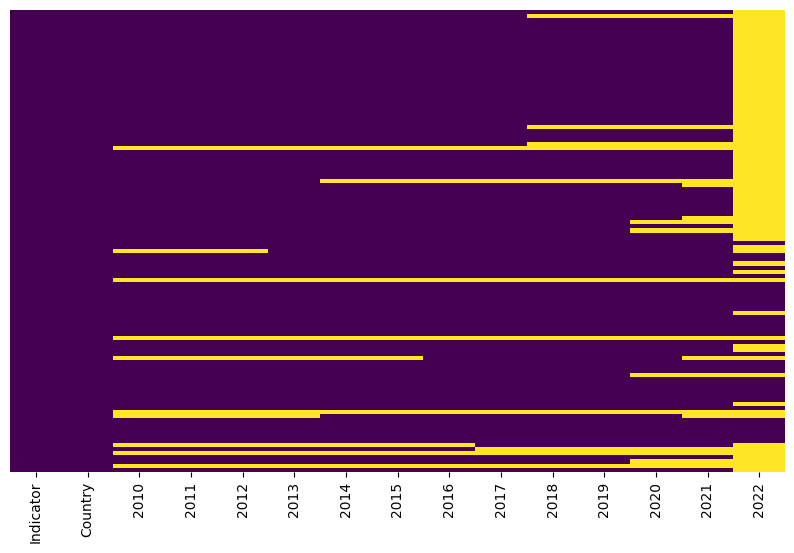

In [12]:
visualize_missing_data(df_GDP)

In [13]:
def handle_missing_values(df, action, value):
    # Calculate the number of missing values for each country
    missing_values = df.isnull().sum(axis=1)

    # Create a new DataFrame to store the country and its corresponding missing values
    missing_df = pd.DataFrame({'Country': df['Country'], 'Missing Values': missing_values})

    if action == 'print':
        # Filter out the rows with missing values greater than or equal to the given value
        missing_df = missing_df[missing_df['Missing Values'] >= value]

        # Sort the DataFrame by the number of missing values in descending order
        missing_df = missing_df.sort_values('Missing Values', ascending=False)

        # Display the DataFrame
        print(missing_df)

    elif action == 'delete':
        # Filter out the rows with missing values greater than or equal to the given value
        missing_countries = missing_df[missing_df['Missing Values'] >= value]['Country']

        # Delete the rows with missing countries from the original DataFrame
        df = df[~df['Country'].isin(missing_countries)]

        # Display the modified DataFrame
        print(df)

    else:
        print("Invalid action. Please choose 'print' or 'delete'.")


In [14]:
handle_missing_values(df_GDP, 'print', 3)

                Country  Missing Values
79               Israel              13
65               Canada              13
107        Turkmenistan              13
97   Russian Federation              13
110       United States              13
33           Montenegro              13
41   Russian Federation               9
84        Liechtenstein               8
105          Tajikistan               8
98           San Marino               6
106             Turkiye               6
28        Liechtenstein               5
32               Monaco               5
1               Andorra               5
58              Armenia               4
51         Turkmenistan               3
53       United Kingdom               3
88               Monaco               3
109      United Kingdom               3


In [15]:
df_GDP = df_GDP.drop('2022', axis = 1)

Missing Values: 129 / 1568


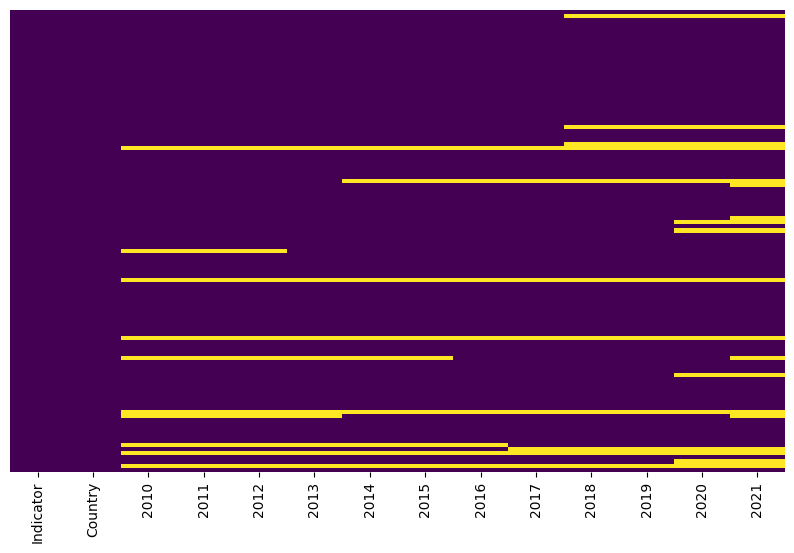

In [17]:
visualize_missing_data(df_GDP)

In [19]:
handle_missing_values(df_GDP, 'print', 3)

                Country  Missing Values
33           Montenegro              12
65               Canada              12
79               Israel              12
97   Russian Federation              12
107        Turkmenistan              12
110       United States              12
41   Russian Federation               8
84        Liechtenstein               7
105          Tajikistan               7
98           San Marino               5
106             Turkiye               5
1               Andorra               4
28        Liechtenstein               4
32               Monaco               4
58              Armenia               3


In [36]:
df_GDP['2022'].count() 

35

In [37]:
df_GDP['2022'].isnull().sum().sum() 

77

In [91]:
df_GDP = df_GDP.drop('2022', axis = 1)

Missing Values: 129 / 1568


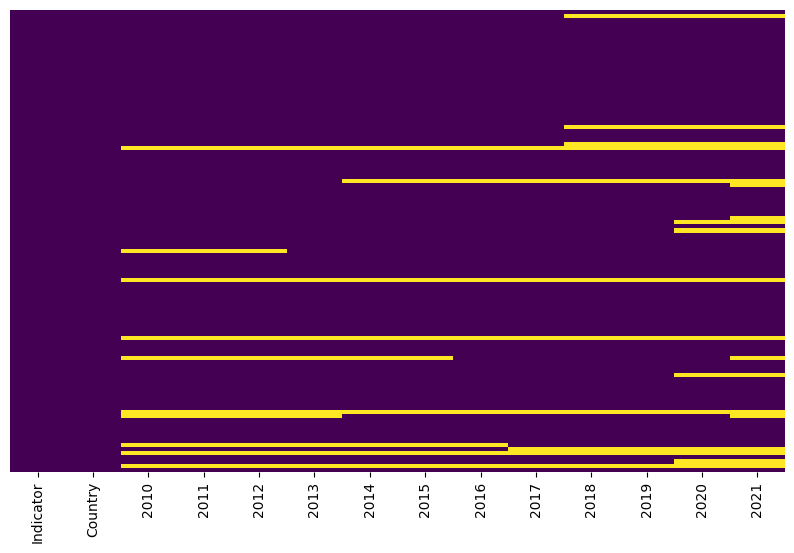

In [92]:
visualize_missing_data(df_GDP)

In [20]:
df_GDP = df_GDP.interpolate(method='linear')


Missing Values: 0 / 1568


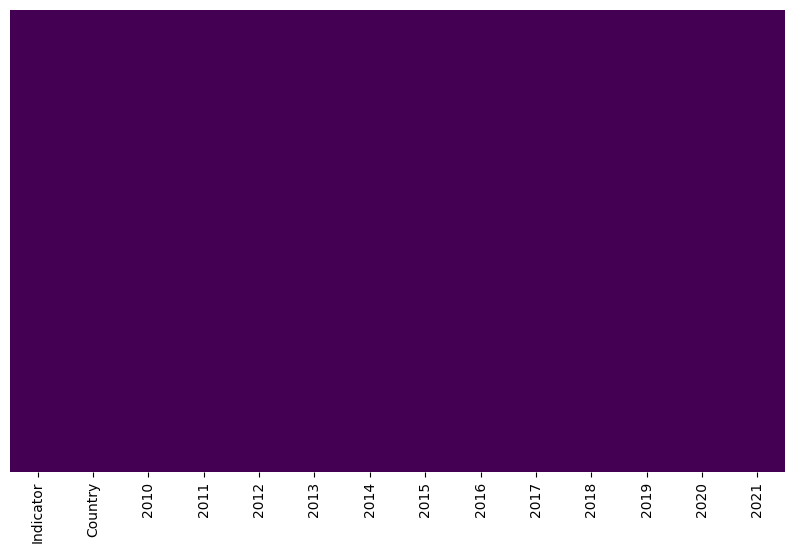

In [21]:
visualize_missing_data(df_GDP)

In [22]:
df_GDP_melted = df_GDP.melt(id_vars=['Indicator', 'Country'], var_name='Year')

# Separate the datasets
df_GDP_values = df_GDP_melted[df_GDP_melted['Indicator'] == 'GDP']
df_GDP_construction = df_GDP_melted[df_GDP_melted['Indicator'] == 'GDP share construction']

# Rename value columns
df_GDP_values = df_GDP_values.rename(columns={'value': 'GDP'})
df_GDP_construction = df_GDP_construction.rename(columns={'value': 'GDP share construction'})

# Merge the datasets on Country and Year
df_GDP = pd.merge(df_GDP_values, df_GDP_construction, on=['Country', 'Year'])

# Remove 'Indicator' columns
df_GDP = df_GDP.drop(columns=['Indicator_x', 'Indicator_y'])

# Reorder columns
df_GDP = df_GDP[['Year', 'Country', 'GDP','GDP share construction']]
df_GDP['GDP construction'] = (df_GDP['GDP'].astype(float) * df_GDP['GDP share construction'].astype(float)) / 100
df_GDP
df_GDP.rename(columns={'Year': 'Date'}, inplace=True)

In [23]:
df_GDP

Date         Country         GDP  GDP share construction  \
0    2010         Albania     28046.0               14.900000   
1    2010         Andorra      3048.0                9.500000   
2    2010         Armenia     21600.0                8.000000   
3    2010         Austria    351342.0                6.500000   
4    2010      Azerbaijan    132907.0                8.700000   
..    ...             ...         ...                     ...   
667  2021    Turkmenistan    405871.0                6.266667   
668  2021         Ukraine    587444.0                3.200000   
669  2021  United Kingdom  11951262.5                4.300000   
670  2021   United States  23315081.0                5.400000   
671  2021      Uzbekistan    296689.0                6.500000   

     GDP construction  
0        4.178854e+03  
1        2.895600e+02  
2        1.728000e+03  
3        2.283723e+04  
4        1.156291e+04  
..                ...  
667      2.543458e+04  
668      1.879821e+04  
669      5.139043e+05  
670      1.259014e+06  
671      1.928478e+04  

[672 rows x 5 columns]

In [24]:
df_GDP['Country'].unique()



array(['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Kazakhstan',
       'Kyrgyzstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
       'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'San Marino', 'Serbia', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Tajikistan',
       'Turkiye', 'Turkmenistan', 'Ukraine', 'United Kingdom',
       'United States', 'Uzbekistan'], dtype=object)

In [25]:
df_GDP.columns

Index(['Date', 'Country', 'GDP', 'GDP share construction', 'GDP construction'], dtype='object')

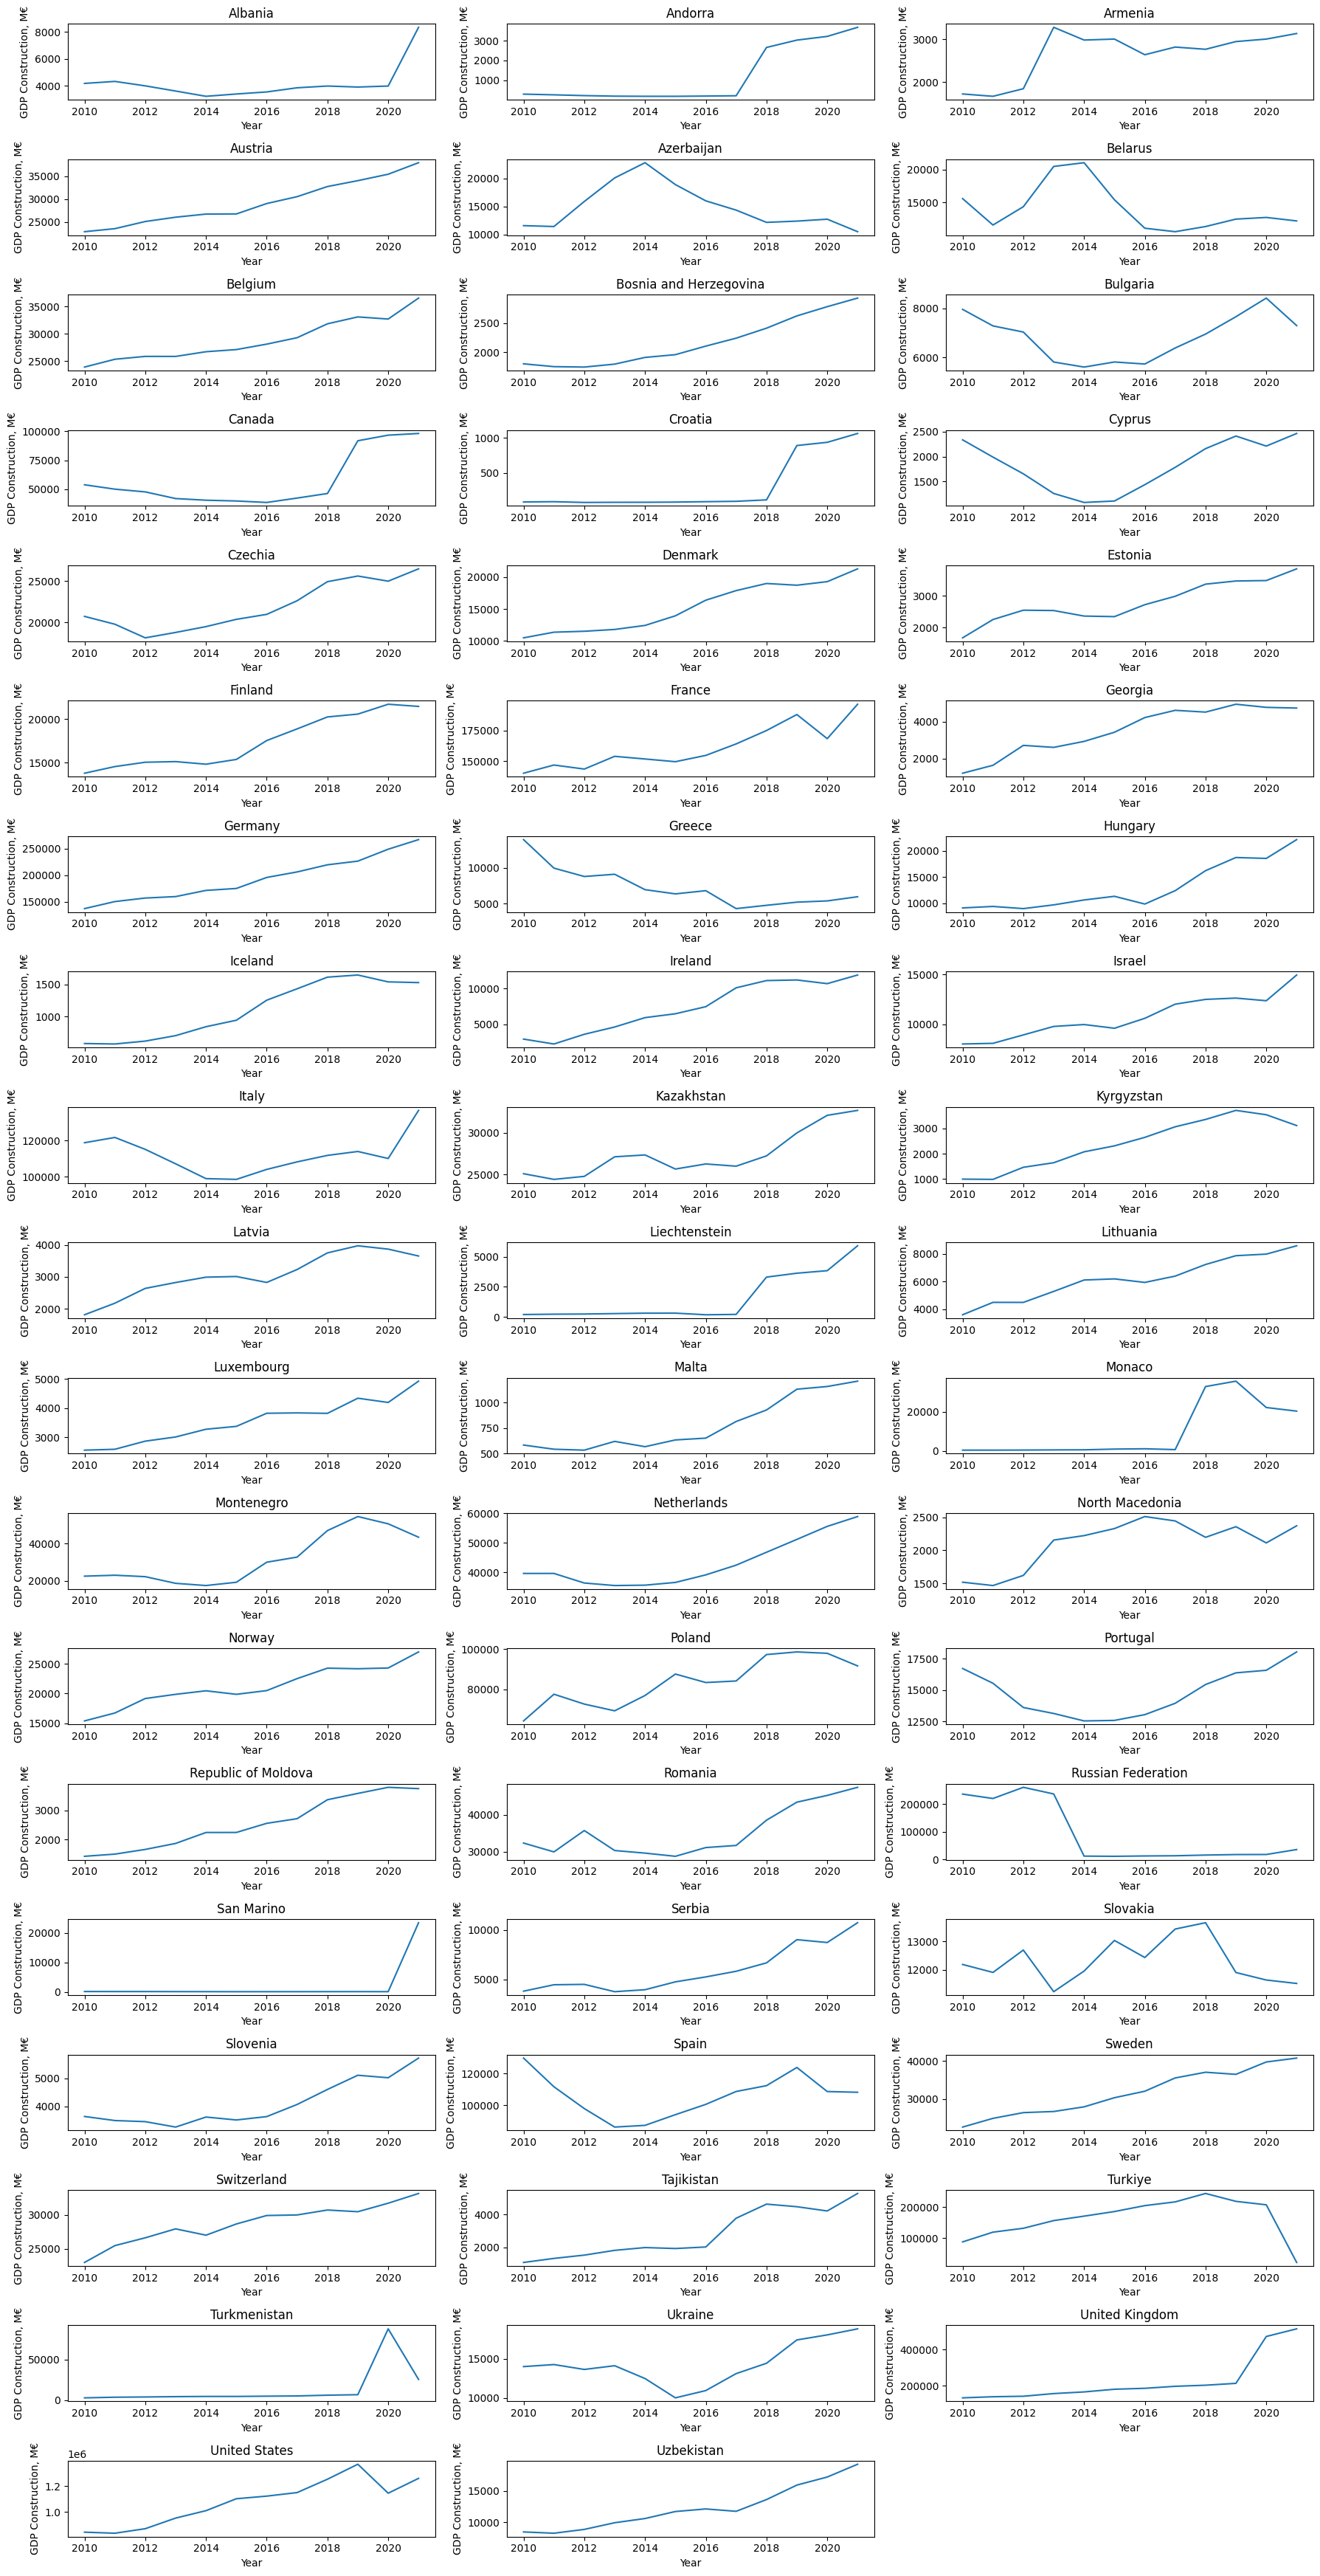

In [26]:
# reshape the dataframe to have years as columns and countries as rows
df_pivot = df_GDP.pivot(index='Country', columns='Date', values='GDP construction')

fig, axs = plt.subplots(nrows=19, ncols=3, figsize=(18,35))  # Adjust grid size as per the number of countries
axs = axs.flatten()  # to iterate over the grid

for i, country in enumerate(df_pivot.index):
    df_pivot.loc[country].plot(kind='line', ax=axs[i])
    axs[i].set_title(country)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('GDP Construction, M€')

# remove unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [27]:
# Assuming your final DataFrame from previous transformation is df_final
df_pivot = df_GDP.pivot(index='Date', columns='Country', values='GDP construction')

# Ensure data types for proper correlation calculation
for col in df_pivot.columns:
    df_pivot[col] = pd.to_numeric(df_pivot[col], errors='coerce')

# Calculate correlation
correlation_matrix = df_pivot.corr()


In [28]:
sorted_correlation = correlation_matrix['Ireland'].sort_values(ascending=False)

# Print the top 5 most similar/correlated countries to Ireland
top_5_countries = sorted_correlation[1:6]  # Exclude Ireland itself
print(top_5_countries)

Country
Iceland                0.983401
Denmark                0.975453
Kyrgyzstan             0.974479
Sweden                 0.973513
Republic of Moldova    0.969306
Name: Ireland, dtype: float64


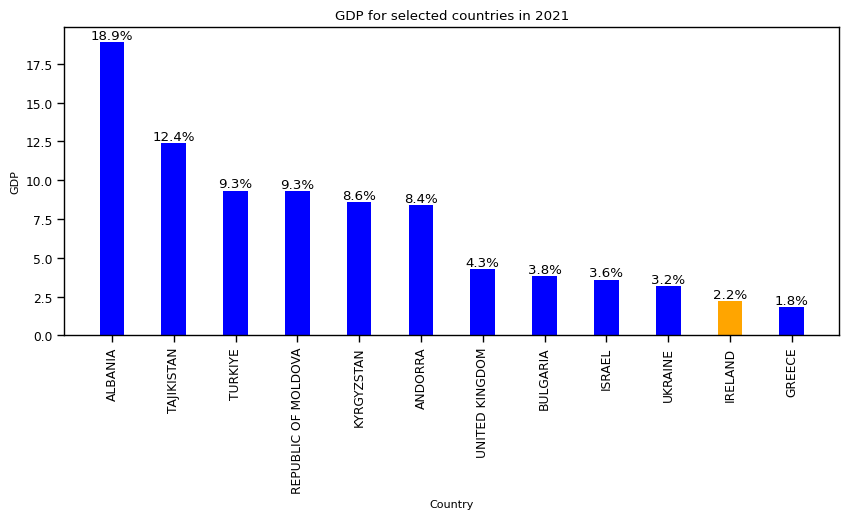

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Country', 'Date', and 'GDP share construction'
df = df_GDP.copy()

# Filter the DataFrame to get the last available year
last_year = df['Date'].max()
df_last_year = df[df['Date'] == last_year]
df_last_year = df_last_year.sort_values('GDP share construction', ascending=False)

# Select the highest 6 and lowest 6 countries
top_countries = df_last_year.head(6)
bottom_countries = df_last_year.tail(6)

# Combine the top and bottom countries, including Ireland
df_selected_countries = pd.concat([top_countries, bottom_countries])

# Plotting the GDP for selected countries
plt.figure(figsize=(10, 4))

# Assigning colors to Ireland and other countries
color_map = ['orange' if country == 'IRELAND' else 'blue' for country in df_selected_countries['Country']]

# Adjust the width of the bars for added space between columns
bar_width = 0.4  # Adjust this value as per your preference

plt.bar(df_selected_countries['Country'], df_selected_countries['GDP share construction'], width=bar_width, color=color_map)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title(f'GDP for selected countries in {last_year}')
plt.xticks(rotation=90)

# Add text annotations for each bar
for i, (country, gdp) in enumerate(zip(df_selected_countries['Country'], df_selected_countries['GDP share construction'])):
    plt.text(i, gdp, f'{round(gdp, 1)}%', ha='center', va='bottom')

plt.show()


Now that we chose which countries we are going to work with, its time to see how their data looks like

# A

In [29]:
dataframes = [df_housePriceIndex, df_buildingPermits, df_demography, df_population, df_enterprises, df_contructionCostIndex, df_labour, df_rentalIndex, df_productionVolume]

merged_df = dataframes[0]

for df in dataframes[1:]:
    merged_df = pd.merge(merged_df, df, on="Date")

merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.year
merged_df = pd.merge(merged_df, df_grouped, on="Date")

merged_df

Date  House Price Index DENMARK  House Price Index IRELAND  \
0   2010                     100.00                     100.00   
1   2011                      98.30                      82.92   
2   2012                      95.65                      71.76   
3   2013                      99.37                      72.66   
4   2014                     103.10                      84.67   
5   2015                     110.30                      94.38   
6   2016                     116.10                     101.40   
7   2017                     121.30                     112.40   
8   2018                     126.60                     123.90   
9   2019                     129.60                     126.80   
10  2020                     136.20                     127.20   

    House Price Index SWEDEN  Residential Permits % DENMARK  \
0                      100.0                           66.6   
1                      102.6                           73.2   
2                      103.9                           53.3   
3                      109.2                           50.9   
4                      119.5                           71.3   
5                      135.2                          100.0   
6                      146.3                          130.4   
7                      156.1                          130.3   
8                      154.6                          175.2   
9                      158.4                          157.6   
10                     165.1                          149.4   

    1 dwelling Permits DENMARK  2+ dwelling Permits DENMARK  \
0                         87.5                         50.8   
1                         83.1                         65.7   
2                         62.7                         46.3   
3                         60.6                         43.6   
4                         71.9                         70.9   
5                        100.0                        100.0   
6                        121.0                        137.6   
7                        123.5                        135.5   
8                        137.6                        203.6   
9                        138.6                        171.9   
10                       152.6                        146.9   

    Residential Permits % IRELAND  1 dwelling Permits IRELAND  \
0                           141.7                       113.2   
1                            89.3                        88.8   
2                            47.9                        52.6   
3                            55.2                        58.6   
4                            56.8                        64.6   
5                           100.0                       100.0   
6                           122.3                       120.2   
7                           159.3                       150.6   
8                           221.9                       194.8   
9                           294.9                       190.9   
10                          324.8                       172.8   

    2+ dwelling Permits IRELAND  ...  Volume of Production SWEDEN  \
0                         246.0  ...                         87.0   
1                          91.2  ...                         93.7   
2                          30.8  ...                         93.0   
3                          42.8  ...                         90.3   
4                          28.1  ...                         91.8   
5                         100.0  ...                        100.0   
6                         130.0  ...                        103.3   
7                         191.0  ...                        114.3   
8                         321.2  ...                        121.8   
9                         676.4  ...                        122.6   
10                        882.7  ...                        121.5   

    Total Purchases DENMARK  Purchases of New Dwellings DENMARK  \
0                   

In [30]:
merged_df.columns

Index(['Date', 'House Price Index DENMARK', 'House Price Index IRELAND',
       'House Price Index SWEDEN', 'Residential Permits % DENMARK',
       '1 dwelling Permits DENMARK', '2+ dwelling Permits DENMARK',
       'Residential Permits % IRELAND', '1 dwelling Permits IRELAND',
       '2+ dwelling Permits IRELAND', 'Residential Permits % SWEDEN',
       '1 dwelling Permits SWEDEN', '2+ dwelling Permits SWEDEN',
       'Net Migration SWEDEN', 'Sum Migration/Immigration SWEDEN',
       'Net Migration IRELAND', 'Sum Migration/Immigration IRELAND',
       'Net Migration DENMARK', 'Sum Migration/Immigration DENMARK',
       'Net Immigration IRELAND', 'Net Immigration SWEDEN',
       'Net Immigration DENMARK', 'Population DENMARK', 'Population IRELAND',
       'Population SWEDEN', 'Number of Companies DENMARK',
       'Number of Emplyees DENMARK', 'Number of Companies IRELAND',
       'Number of Emplyees IRELAND', 'Number of Companies SWEDEN',
       'Number of Emplyees SWEDEN', 'Constructio

Missing Values: 6 / 605


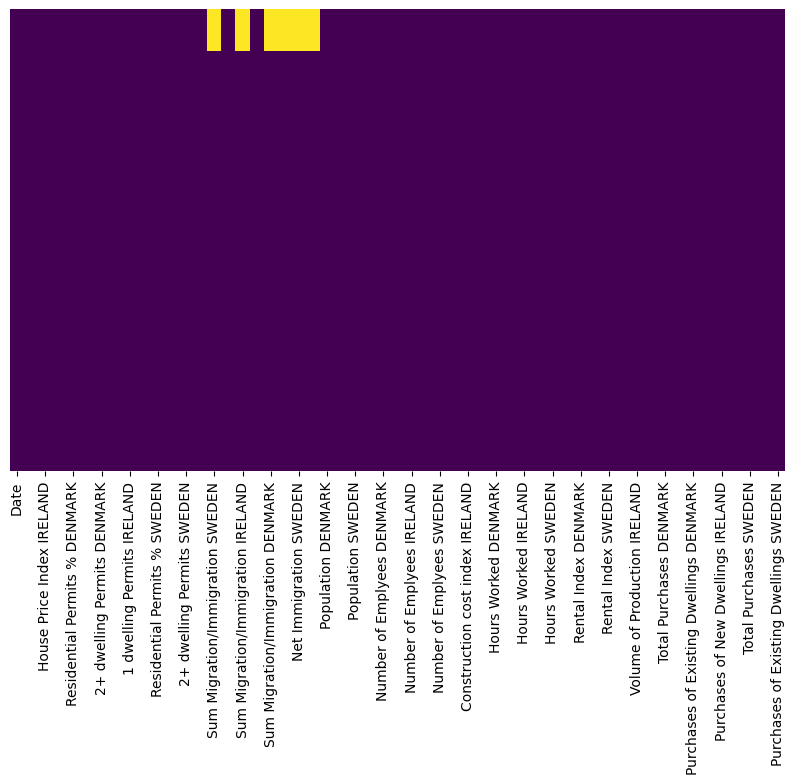

In [31]:
visualize_missing_data(merged_df)

In [32]:
merged_df.shape

(11, 55)

In [33]:
merged_df.isnull().sum()

Date                                       0
House Price Index DENMARK                  0
House Price Index IRELAND                  0
House Price Index SWEDEN                   0
Residential Permits % DENMARK              0
1 dwelling Permits DENMARK                 0
2+ dwelling Permits DENMARK                0
Residential Permits % IRELAND              0
1 dwelling Permits IRELAND                 0
2+ dwelling Permits IRELAND                0
Residential Permits % SWEDEN               0
1 dwelling Permits SWEDEN                  0
2+ dwelling Permits SWEDEN                 0
Net Migration SWEDEN                       0
Sum Migration/Immigration SWEDEN           1
Net Migration IRELAND                      0
Sum Migration/Immigration IRELAND          1
Net Migration DENMARK                      0
Sum Migration/Immigration DENMARK          1
Net Immigration IRELAND                    1
Net Immigration SWEDEN                     1
Net Immigration DENMARK                    1
Population

In [34]:
df_loc = merged_df.melt(id_vars='Date', var_name='Metric', value_name='Value')
df_loc[['Metric', 'Country']] = df_loc['Metric'].str.rsplit(' ', 1, expand=True)

# Pivot the DataFrame to get metrics as columns
df_loc = df_loc.pivot_table(index=['Date', 'Country'], columns='Metric', values='Value').reset_index()

# Renaming the columns
df_loc.columns.name = None
df_loc.columns = df_loc.columns.str.replace(' ', '_')

df_loc.to_csv('outsff464df1.csv', index=False)
#melted_df = pd.melt(merge_aux5, id_vars='date', var_name='COUNTRY', value_name='VALUE')
#melted_df = melted_df.drop_duplicates()

# Reshape the data into the desired format
#reshaped_df = melted_df.pivot(index='date', columns='COUNTRY', values='VALUE').reset_index()
#merge_aux5.columns


<ipython-input-34-ecc83bf08a0b>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_loc[['Metric', 'Country']] = df_loc['Metric'].str.rsplit(' ', 1, expand=True)


In [35]:
df_loc

Date  Country  1_dwelling_Permits  2+_dwelling_Permits  \
0   2010  DENMARK                87.5                 50.8   
1   2010  IRELAND               113.2                246.0   
2   2010   SWEDEN                92.2                 43.4   
3   2011  DENMARK                83.1                 65.7   
4   2011  IRELAND                88.8                 91.2   
5   2011   SWEDEN                77.9                 50.1   
6   2012  DENMARK                62.7                 46.3   
7   2012  IRELAND                52.6                 30.8   
8   2012   SWEDEN                59.8                 47.0   
9   2013  DENMARK                60.6                 43.6   
10  2013  IRELAND                58.6                 42.8   
11  2013   SWEDEN                64.6                 63.0   
12  2014  DENMARK                71.9                 70.9   
13  2014  IRELAND                64.6                 28.1   
14  2014   SWEDEN                82.7                 73.4   
15  2015  DENMARK               100.0                100.0   
16  2015  IRELAND               100.0                100.0   
17  2015   SWEDEN               100.0                100.0   
18  2016  DENMARK               121.0                137.6   
19  2016  IRELAND               120.2                130.0   
20  2016   SWEDEN               124.0                123.8   
21  2017  DENMARK               123.5                135.5   
22  2017  IRELAND               150.6                191.0   
23  2017   SWEDEN               121.7                140.2   
24  2018  DENMARK               137.6                203.6   
25  2018  IRELAND               194.8                321.2   
26  2018   SWEDEN               101.2                118.5   
27  2019  DENMARK               138.6                171.9   
28  2019  IRELAND               190.9                676.4   
29  2019   SWEDEN               105.2                 99.4   
30  2020  DENMARK               152.6                146.9   
31  2020  IRELAND               172.8                882.7   
32  2020   SWEDEN               113.8                123.6   

    Construction_cost_index  Hours_Worked  House_Price_Index  Labour_Costs  \
0                      89.6         104.0             100.00          96.9   
1                      99.3          82.6             100.00          85.8   
2                      90.3          85.2             100.00          72.4   
3                      92.8         106.0              98.30         100.3   
4                      97.1          80.8              82.92          79.0   
5                      93.0          89.6             102.60          78.7   
6                      95.2         105.6              95.65         101.8   
7                      98.1          73.0              71.76          72.4   
8                      95.4          94.0             103.90          85.4   
9                      96.6          93.6              99.37          89.7   
10                     98.9          73.9              72.66          74.1   
11                     97.0          95.5             109.20          89.0   
12                     98.1          96.6             103.10          93.7   
13                     99.5          89.3              84.67          89.3   
14                     97.8          96.3             119.50          92.3   
15                    100.0         100.0             110.30         100.0   
16                    100.0         100.0              94.38         100.1   
17                    100.0         100.0             135.20         100.0   
18                    101.6         103.4             116.10         107.4   
19                    100.4         115.4             101.40         117.4   
20                    102.2         106.3             146.30         107.7   
21                    102.4         107.1             121.30         114.7   
22                    101.7         124.5             112.40         128.6   
23                    1

In [36]:
df_netEarning = df_netEarning.drop(0)

In [37]:
df_netEarning['Date'] = df_netEarning['Date'].astype(int)
df_netEarning['Net Earnings'] = df_netEarning['Net Earnings'].astype(float)

In [38]:
df_netEarning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 1 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39 non-null     object 
 1   Date          39 non-null     int64  
 2   Net Earnings  39 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [39]:
df_loc = pd.merge(df_loc, df_netEarning,  on=['Country', 'Date'])

In [ ]:
df_final = df_final.rename(columns={'Country': 'COUNTRY'})

In [43]:
df_GDP['Date'] = df_GDP['Date'].astype(int)

In [41]:
df_GDP

Date         Country         GDP  GDP share construction  \
0    2010         Albania     28046.0               14.900000   
1    2010         Andorra      3048.0                9.500000   
2    2010         Armenia     21600.0                8.000000   
3    2010         Austria    351342.0                6.500000   
4    2010      Azerbaijan    132907.0                8.700000   
..    ...             ...         ...                     ...   
667  2021    Turkmenistan    405871.0                6.266667   
668  2021         Ukraine    587444.0                3.200000   
669  2021  United Kingdom  11951262.5                4.300000   
670  2021   United States  23315081.0                5.400000   
671  2021      Uzbekistan    296689.0                6.500000   

     GDP construction  
0        4.178854e+03  
1        2.895600e+02  
2        1.728000e+03  
3        2.283723e+04  
4        1.156291e+04  
..                ...  
667      2.543458e+04  
668      1.879821e+04  
669      5.139043e+05  
670      1.259014e+06  
671      1.928478e+04  

[672 rows x 5 columns]

In [42]:
df_GDP['Country'] = df_GDP['Country'].str.upper()


In [40]:
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    672 non-null    object 
 1   Country                 672 non-null    object 
 2   GDP                     672 non-null    float64
 3   GDP share construction  672 non-null    float64
 4   GDP construction        672 non-null    float64
dtypes: float64(3), object(2)
memory usage: 31.5+ KB


In [44]:
df_loc = pd.merge(df_loc, df_GDP,  on=['Country', 'Date'])

In [45]:
df_loc

Date  Country  1_dwelling_Permits  2+_dwelling_Permits  \
0   2010  DENMARK                87.5                 50.8   
1   2010  IRELAND               113.2                246.0   
2   2010   SWEDEN                92.2                 43.4   
3   2011  DENMARK                83.1                 65.7   
4   2011  IRELAND                88.8                 91.2   
5   2011   SWEDEN                77.9                 50.1   
6   2012  DENMARK                62.7                 46.3   
7   2012  IRELAND                52.6                 30.8   
8   2012   SWEDEN                59.8                 47.0   
9   2013  DENMARK                60.6                 43.6   
10  2013  IRELAND                58.6                 42.8   
11  2013   SWEDEN                64.6                 63.0   
12  2014  DENMARK                71.9                 70.9   
13  2014  IRELAND                64.6                 28.1   
14  2014   SWEDEN                82.7                 73.4   
15  2015  DENMARK               100.0                100.0   
16  2015  IRELAND               100.0                100.0   
17  2015   SWEDEN               100.0                100.0   
18  2016  DENMARK               121.0                137.6   
19  2016  IRELAND               120.2                130.0   
20  2016   SWEDEN               124.0                123.8   
21  2017  DENMARK               123.5                135.5   
22  2017  IRELAND               150.6                191.0   
23  2017   SWEDEN               121.7                140.2   
24  2018  DENMARK               137.6                203.6   
25  2018  IRELAND               194.8                321.2   
26  2018   SWEDEN               101.2                118.5   
27  2019  DENMARK               138.6                171.9   
28  2019  IRELAND               190.9                676.4   
29  2019   SWEDEN               105.2                 99.4   
30  2020  DENMARK               152.6                146.9   
31  2020  IRELAND               172.8                882.7   
32  2020   SWEDEN               113.8                123.6   

    Construction_cost_index  Hours_Worked  House_Price_Index  Labour_Costs  \
0                      89.6         104.0             100.00          96.9   
1                      99.3          82.6             100.00          85.8   
2                      90.3          85.2             100.00          72.4   
3                      92.8         106.0              98.30         100.3   
4                      97.1          80.8              82.92          79.0   
5                      93.0          89.6             102.60          78.7   
6                      95.2         105.6              95.65         101.8   
7                      98.1          73.0              71.76          72.4   
8                      95.4          94.0             103.90          85.4   
9                      96.6          93.6              99.37          89.7   
10                     98.9          73.9              72.66          74.1   
11                     97.0          95.5             109.20          89.0   
12                     98.1          96.6             103.10          93.7   
13                     99.5          89.3              84.67          89.3   
14                     97.8          96.3             119.50          92.3   
15                    100.0         100.0             110.30         100.0   
16                    100.0         100.0              94.38         100.1   
17                    100.0         100.0             135.20         100.0   
18                    101.6         103.4             116.10         107.4   
19                    100.4         115.4             101.40         117.4   
20                    102.2         106.3             146.30         107.7   
21                    102.4         107.1             121.30         114.7   
22                    101.7         124.5             112.40         128.6   
23                    1

In [149]:
df_loc.columns

Index(['Date', 'Country', '1_dwelling_Permits', '2+_dwelling_Permits',
       'Construction_cost_index', 'Hours_Worked', 'House_Price_Index',
       'Labour_Costs', 'Net_Immigration', 'Net_Migration',
       'Number_of_Companies', 'Number_of_Emplyees', 'Population',
       'Purchases_of_Existing_Dwellings', 'Purchases_of_New_Dwellings',
       'Rental_Index', 'Residential_Permits_%', 'Sum_Migration/Immigration',
       'Total_Purchases', 'Volume_of_Production', 'Net Earnings', 'GDP',
       'GDP share construction', 'GDP construction'],
      dtype='object')

# Getting Rid of Nulls

In [150]:
df_loc.isnull().sum()

Date                               0
Country                            0
1_dwelling_Permits                 0
2+_dwelling_Permits                0
Construction_cost_index            0
Hours_Worked                       0
House_Price_Index                  0
Labour_Costs                       0
Net_Immigration                    3
Net_Migration                      0
Number_of_Companies                0
Number_of_Emplyees                 0
Population                         0
Purchases_of_Existing_Dwellings    0
Purchases_of_New_Dwellings         0
Rental_Index                       0
Residential_Permits_%              0
Sum_Migration/Immigration          3
Total_Purchases                    0
Volume_of_Production               0
Net Earnings                       0
GDP                                0
GDP share construction             0
GDP construction                   0
dtype: int64

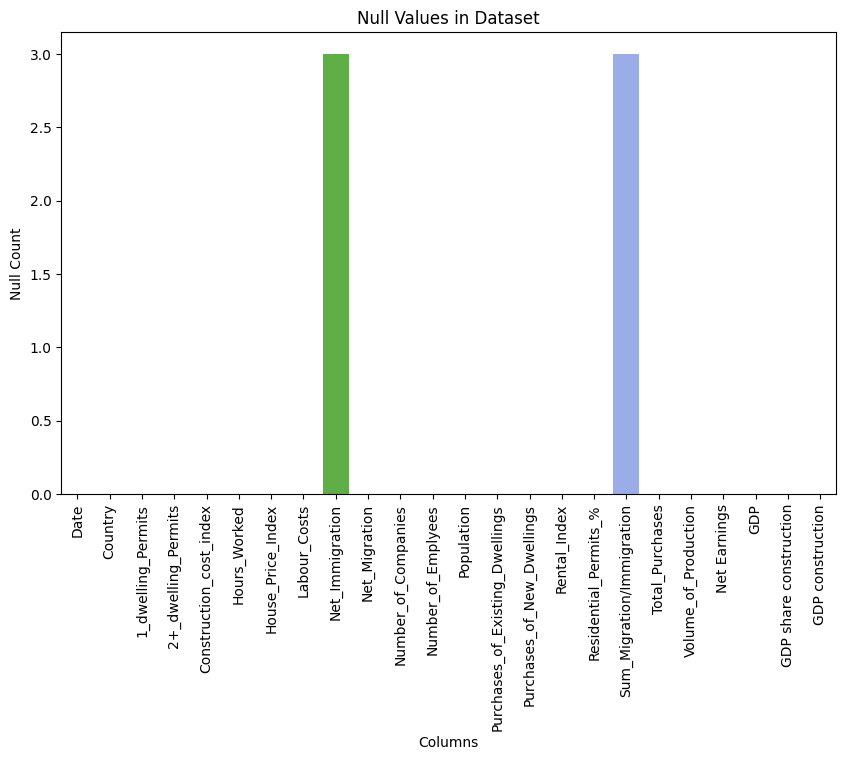

"\nplt.figure(figsize=(10, 6))\nsns.heatmap(df_loc.isnull(), cmap='viridis', cbar=False)\nplt.title('Null Values Heatmap')\nplt.show()\n"

In [151]:


# Create a bar plot showing the count of null values in each column
null_counts = df_loc.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.title('Null Values in Dataset')
plt.show()

# Create a heatmap to visualize the null values
"""
plt.figure(figsize=(10, 6))
sns.heatmap(df_loc.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()
"""

In [1]:
df_loc.info()

NameError: ignored

In [153]:
# Sort the DataFrame by the time component
df_loc = df_loc.sort_values('Date')

# Forward fill (carry forward) missing values
df_filled_forward = df_loc.ffill()

# Backward fill (carry backward) missing values
df_filled_backward = df_loc.bfill()

# Linear interpolation to fill missing values
df_filled_interpolation = df_loc.interpolate()

df_filled_backward.isnull().sum()

Date                               0
Country                            0
1_dwelling_Permits                 0
2+_dwelling_Permits                0
Construction_cost_index            0
Hours_Worked                       0
House_Price_Index                  0
Labour_Costs                       0
Net_Immigration                    0
Net_Migration                      0
Number_of_Companies                0
Number_of_Emplyees                 0
Population                         0
Purchases_of_Existing_Dwellings    0
Purchases_of_New_Dwellings         0
Rental_Index                       0
Residential_Permits_%              0
Sum_Migration/Immigration          0
Total_Purchases                    0
Volume_of_Production               0
Net Earnings                       0
GDP                                0
GDP share construction             0
GDP construction                   0
dtype: int64

In [ ]:
df_loc = df_filled_backward

In [154]:
df_loc.to_csv('data.csv', index=False)

# Statistics

In [155]:
df_loc.describe()

Date  1_dwelling_Permits  2+_dwelling_Permits  \
count    33.000000           33.000000            33.000000   
mean   2015.000000          105.736364           148.345455   
std       3.211308           37.818711           177.253865   
min    2010.000000           52.600000            28.100000   
25%    2012.000000           77.900000            50.800000   
50%    2015.000000          100.000000           100.000000   
75%    2018.000000          123.500000           140.200000   
max    2020.000000          194.800000           882.700000   

       Construction_cost_index  Hours_Worked  House_Price_Index  Labour_Costs  \
count                33.000000     33.000000          33.000000     33.000000   
mean                100.706061    104.048485         114.712424    106.490909   
std                   5.724342     17.374463          24.068115     23.556758   
min                  89.600000     73.000000          71.760000     72.400000   
25%                  97.100000     94.000000         100.000000     89.300000   
50%                 100.000000    104.000000         110.300000    100.300000   
75%                 104.900000    110.300000         127.200000    121.900000   
max                 112.100000    145.500000         165.100000    161.800000   

       Net_Immigration  Net_Migration  Number_of_Companies  ...  \
count        30.000000      33.000000            33.000000  ...   
mean     116695.400000   32674.151515         60974.757576  ...   
std       22056.222849   34839.669252         27858.169635  ...   
min       91240.000000  -27171.000000         30707.000000  ...   
25%       98014.500000   13406.000000         33306.000000  ...   
50%      111768.000000   24923.000000         51568.000000  ...   
75%      129160.500000   49734.000000         93598.000000  ...   
max      166098.000000  117693.000000        104097.000000  ...   

       Purchases_of_New_Dwellings  Rental_Index  Residential_Permits_%  \
count                   33.000000     33.000000              33.000000   
mean                    98.744242    100.197879             114.287879   
std                     22.326566     12.116642              66.149517   
min                     40.482500     79.800000              47.900000   
25%                     89.537500     92.400000              63.500000   
50%                     99.995000    100.000000             100.000000   
75%                    112.775000    104.700000             135.100000   
max                    132.525000    130.100000             324.800000   

       Sum_Migration/Immigration  Total_Purchases  Volume_of_Production  \
count                  30.000000        33.000000             33.000000   
mean               151276.266667       101.754773            104.078788   
std                 23430.333193        18.038600             16.746880   
min                106774.000000        73.965000             77.000000   
25%                139594.750000        88.402500             91.800000   
50%                150235.500000        99.995000            100.000000   
75%                157984.500000       115.425000            114.800000   
max                209449.000000       134.825000            144.800000   

       Net Earnings            GDP  GDP share construction  GDP construction  
count     33.000000      33.000000               33.000000         33.000000  
mean   18719.993333  362167.818182                4.496970      17543.292000  
std     1377.386258  112598.405414                1.841617      10934.191929  
min    15477.550000  197047.000000                1.100000       2271.456000  
25%    17836.310000  262368.000000                2.600000      10496.948000  
50%    18632.530000  340269.000000                5.000000      13937.400000  
75%    19457.010000  444617.000000                6.000000      26381.768000  
max    22142.750000  575972.000000                6.900000      39742.068000  

[8 rows x 23 columns]

In [156]:
df_loc.columns


Index(['Date', 'Country', '1_dwelling_Permits', '2+_dwelling_Permits',
       'Construction_cost_index', 'Hours_Worked', 'House_Price_Index',
       'Labour_Costs', 'Net_Immigration', 'Net_Migration',
       'Number_of_Companies', 'Number_of_Emplyees', 'Population',
       'Purchases_of_Existing_Dwellings', 'Purchases_of_New_Dwellings',
       'Rental_Index', 'Residential_Permits_%', 'Sum_Migration/Immigration',
       'Total_Purchases', 'Volume_of_Production', 'Net Earnings', 'GDP',
       'GDP share construction', 'GDP construction'],
      dtype='object')

<ipython-input-157-7b5ee3398a44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_loc.corr()


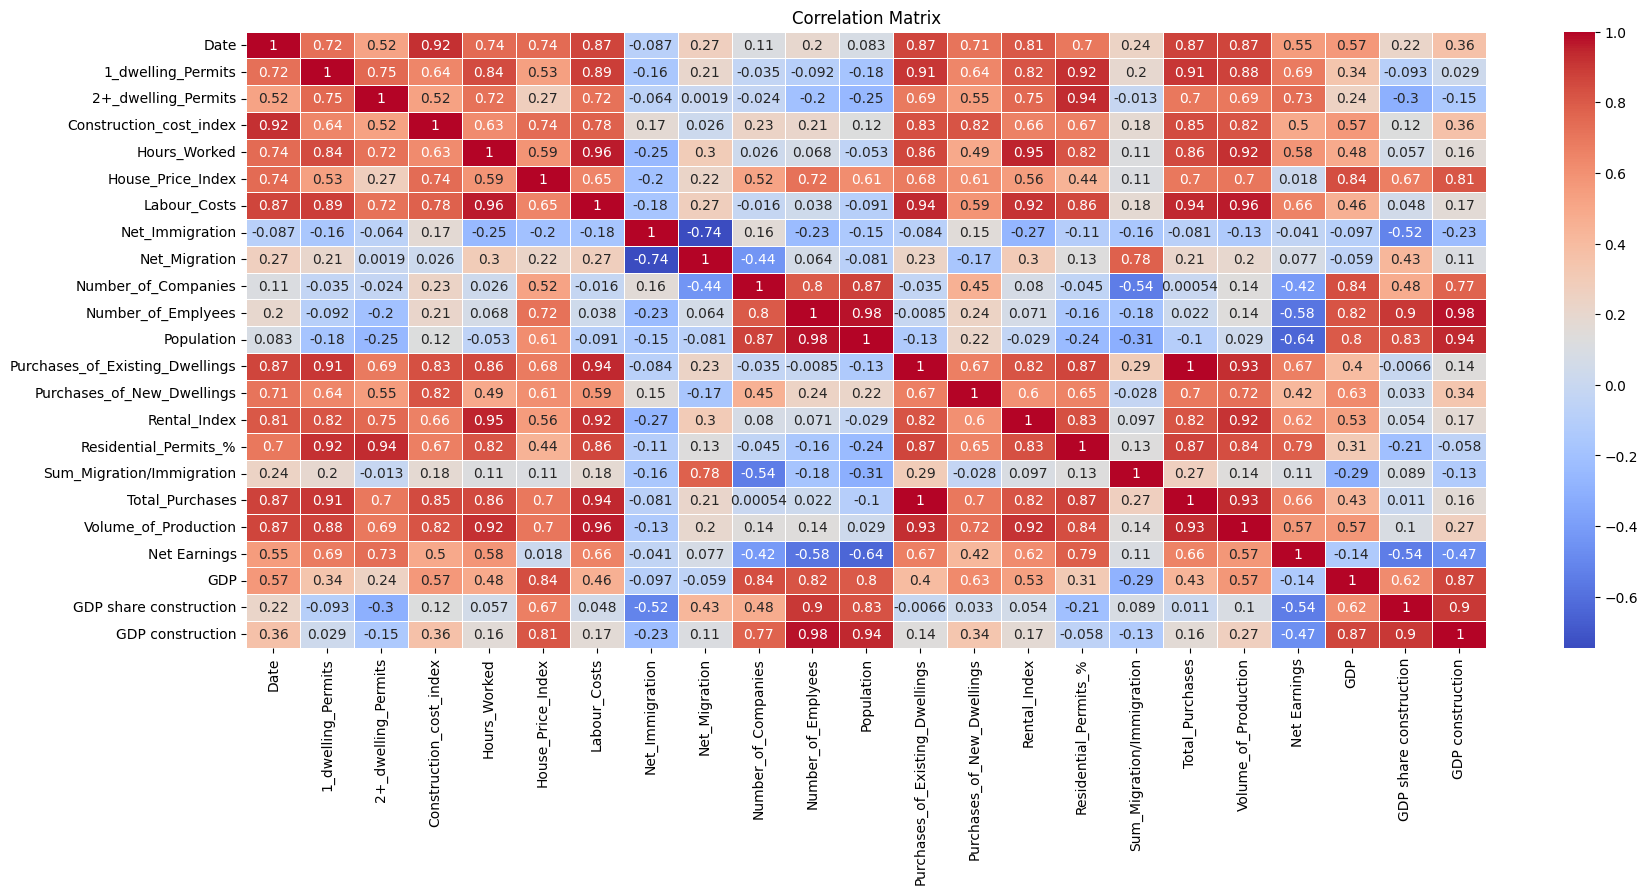

In [157]:
correlation_matrix = df_loc.corr()

# Create a correlation matrix plot
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Confidence Interval for Population Proportion of Yearly Apartment Builds out of All Home Builds:

We are going to calculate the confidence interval for the population proportion of yearly apartment builds out of all home builds. To do this, we are considering the "1_dwelling_Permits" and "2+_dwelling_Permits" columns. For instance, the proportion for Denmark in 2014 would be calculated by adding the number of "1_dwelling_Permits" and "2+_dwelling_Permits" and dividing by the total. By collecting these proportions for each country and year, you can then calculate a confidence interval to estimate the population proportion.

In [158]:
df_loc['Proportion_Apartment_Builds'] = df_loc['2+_dwelling_Permits'] / (df_loc['1_dwelling_Permits'] + df_loc['2+_dwelling_Permits'])

# Number of observations
n = len(df_loc)

# Sample proportion
p_hat = df_loc['Proportion_Apartment_Builds'].mean()

# Z-value for 95% confidence
z = stats.norm.ppf(0.975)

# Standard error
se = np.sqrt((p_hat * (1 - p_hat)) / n)

# Confidence interval
conf_interval = [p_hat - z * se, p_hat + z * se]

print('95% confidence interval for the population proportion of yearly apartment builds out of all home builds:', conf_interval)



95% confidence interval for the population proportion of yearly apartment builds out of all home builds: [0.3337859446502812, 0.674958835142711]


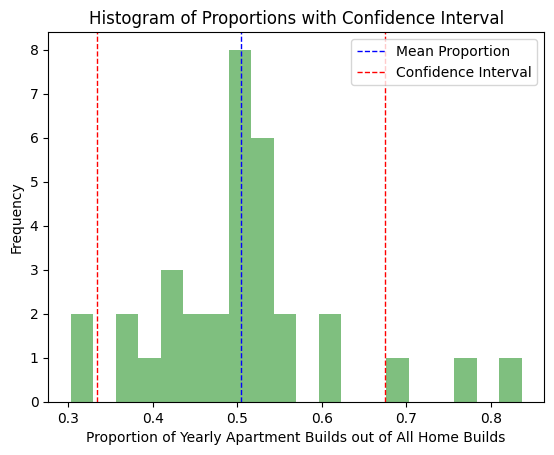

In [159]:

# Calculate the proportions
#proportions = df['2+_dwelling_Permits'] / (df['1_dwelling_Permits'] + df['2+_dwelling_Permits'])

# Create a histogram of the proportions
plt.hist(df_loc['Proportion_Apartment_Builds'], bins=20, alpha=0.5, color='g')

# Add a vertical line for the mean proportion
plt.axvline(p_hat, color='blue', linestyle='dashed', linewidth=1)

# Add vertical lines for the confidence interval
plt.axvline(conf_interval[0], color='red', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[1], color='red', linestyle='dashed', linewidth=1)

# Add a legend
plt.legend(['Mean Proportion', 'Confidence Interval'])

# Add labels and title
plt.xlabel('Proportion of Yearly Apartment Builds out of All Home Builds')
plt.ylabel('Frequency')
plt.title('Histogram of Proportions with Confidence Interval')

# Show the plot
plt.show()


## Hypothesis Testing for the Mean of Construction Costs t-test

**H0**: "There is no difference between the mean Construction_cost_index for Denmark and Ireland." 

**H1**: "There is a difference between the mean Construction_cost_index for Denmark and Ireland."

In [160]:
denmark_data = df_loc[df_loc['Country'] == 'DENMARK']['Construction_cost_index']
ireland_data = df_loc[df_loc['Country'] == 'IRELAND']['Construction_cost_index']

t_statistic, p_value = stats.ttest_ind(denmark_data, ireland_data)

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We fail to reject the null hypothesis


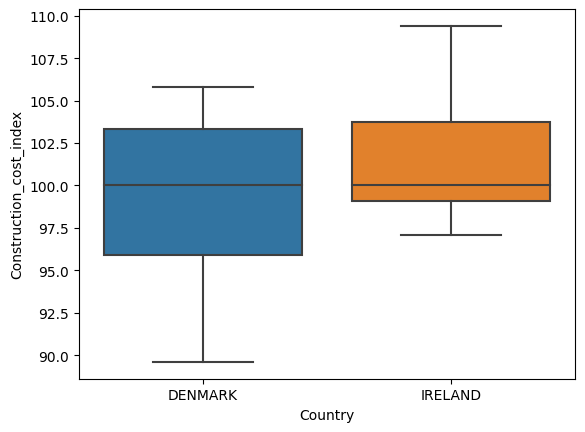

In [163]:
# Filter only Denmark and Ireland data
df_filtered = df_loc[df_loc['Country'].isin(['DENMARK', 'IRELAND'])]

# Create box plots
sns.boxplot(x='Country', y='Construction_cost_index', data=df_filtered)

# Show the plot
plt.show()


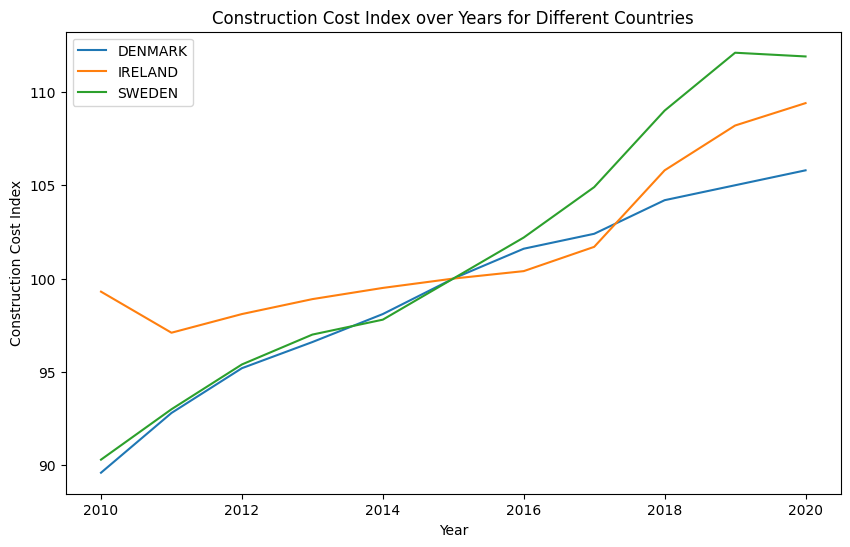

In [164]:
plt.figure(figsize=(10,6))

# List of countries in your dataset
countries = df_loc['Country'].unique()

for country in countries:
    country_data = df_loc[df_loc['Country'] == country]
    plt.plot(country_data['Date'], country_data['Construction_cost_index'], label=country)

plt.xlabel('Year')
plt.ylabel('Construction Cost Index')
plt.title('Construction Cost Index over Years for Different Countries')
plt.legend()
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00


In [ ]:


# Load your dataset into a pandas DataFrame
#df = pd.read_csv('your_dataset.csv')

# Iterate through each column for change point detection
for column_name in df_loc.columns:
    if df_loc[column_name].dtype != np.number:
        continue  # Skip non-numeric columns

    data = df_loc[column_name].values

    # Perform change point detection using Pelt algorithm
    model = "l2"  # l2-norm as the cost function
    algo = rpt.Pelt(model=model).fit(data)
    result = algo.predict(pen=10)  # Change point prediction with penalty parameter

    # Plot the change points
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    for cp in result:
        plt.axvline(x=cp, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title(f'Change Point Detection - {column_name}')
    plt.show()


In [ ]:
# Filter the DataFrame for the "Country" column equals "Ireland"
filtered_df = df_loc[df_loc['COUNTRY'] == 'IRELAND']

# Iterate through each column for change point detection
for column_name in filtered_df.columns:
    if filtered_df[column_name].dtype != np.number:
        continue  # Skip non-numeric columns

    data = filtered_df[column_name].values

    # Perform change point detection using Pelt algorithm
    model = "l2"  # l2-norm as the cost function
    algo = rpt.Pelt(model=model).fit(data)
    result = algo.predict(pen=10)  # Change point prediction with penalty parameter

    # Plot the change points
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    for cp in result:
        plt.axvline(x=cp, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title(f'Change Point Detection - {column_name} (Ireland)')
    plt.show()

<ipython-input-100-f825bf79f639>:8: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df_ireland[column_name].dtype != np.number:


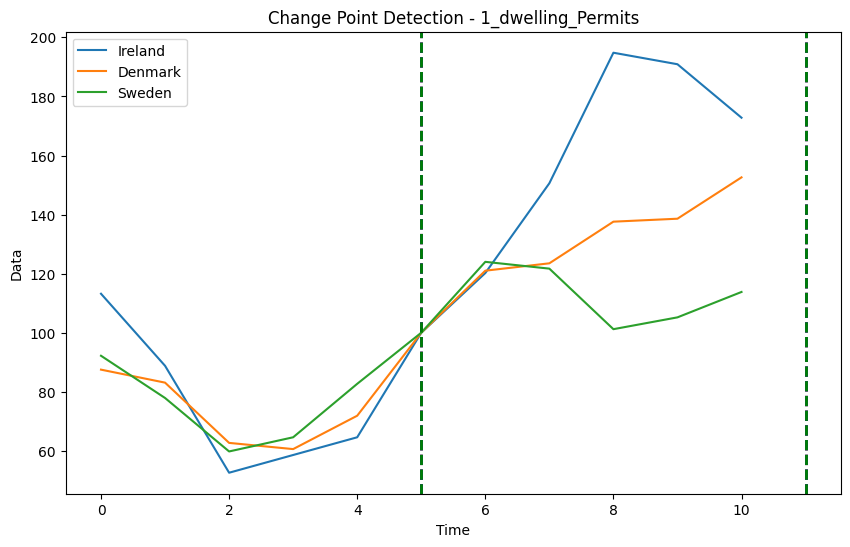

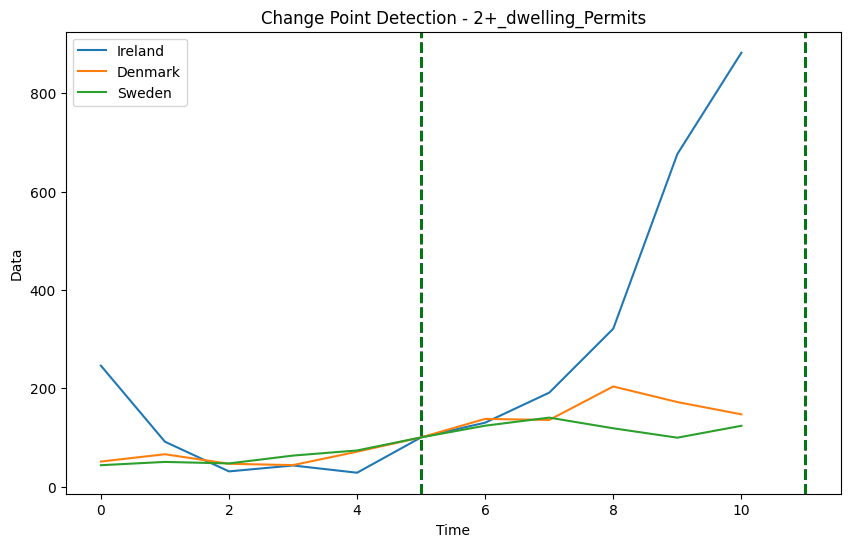

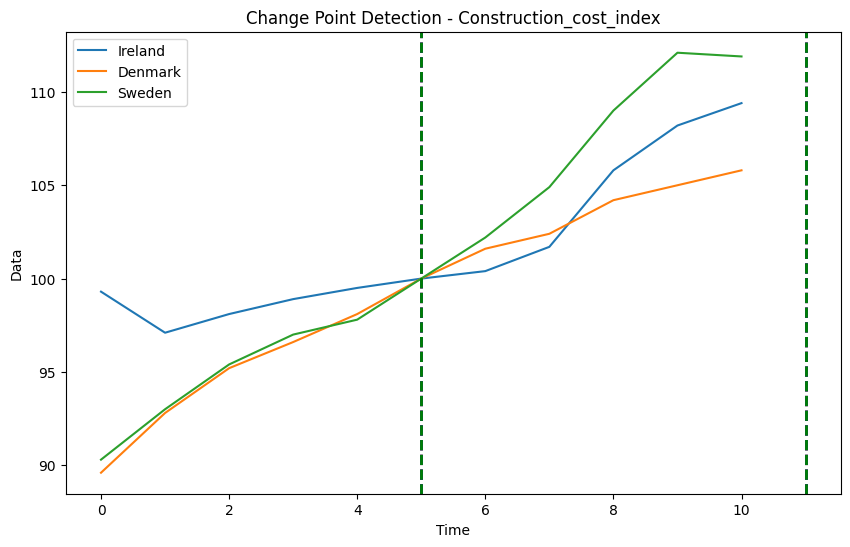

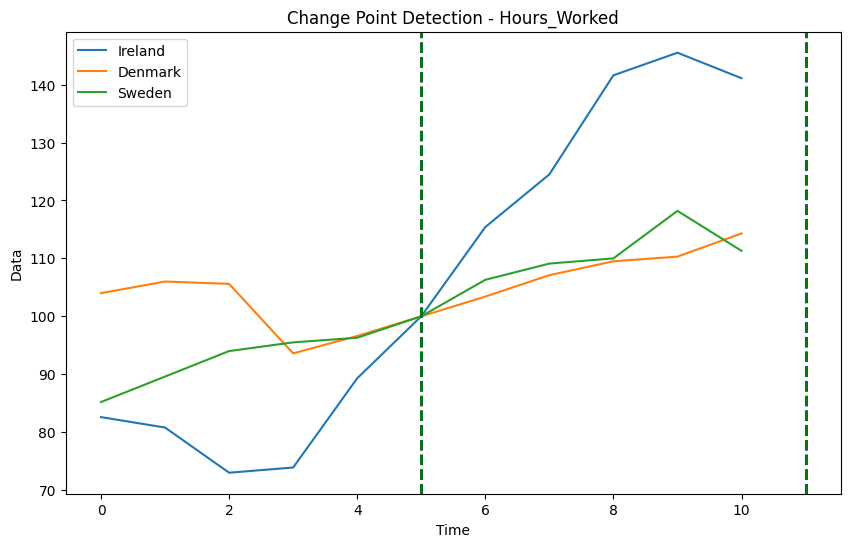

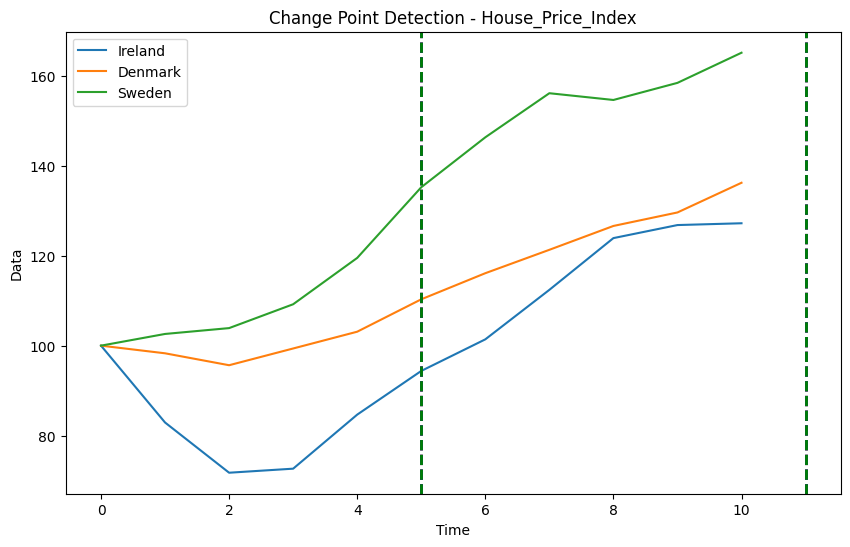

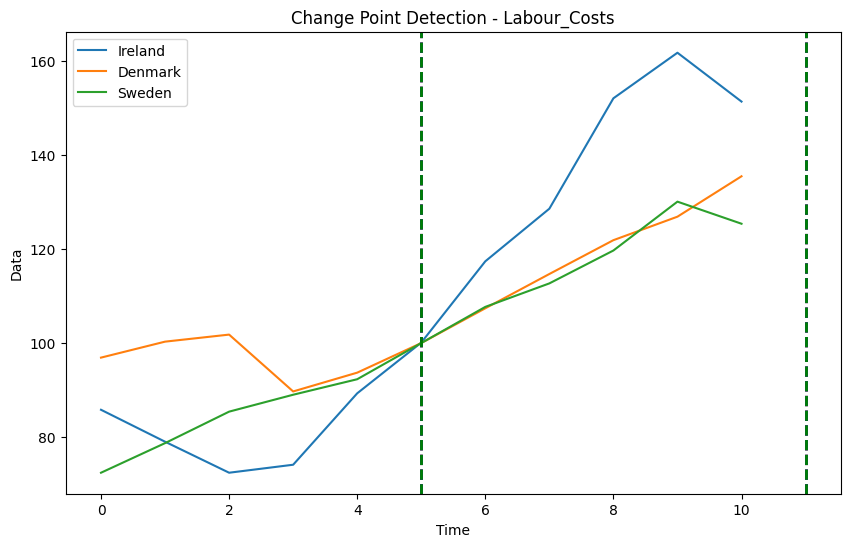

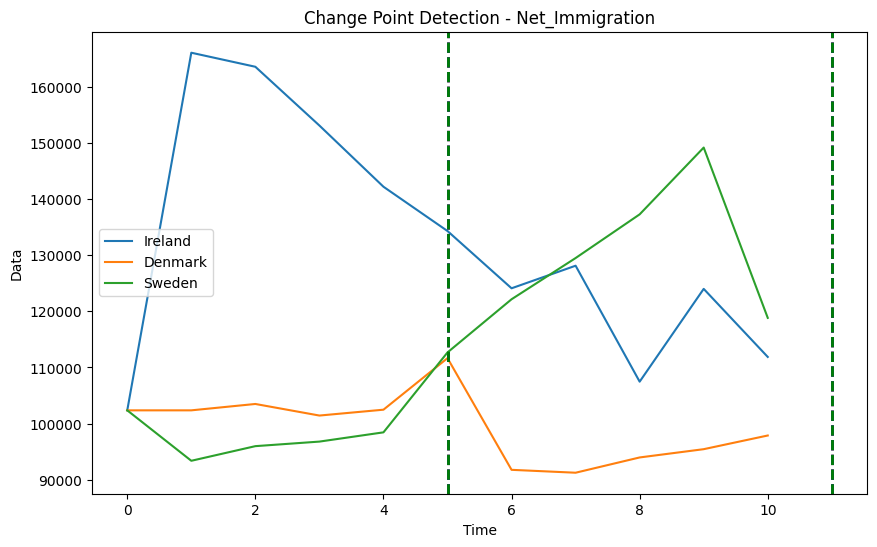

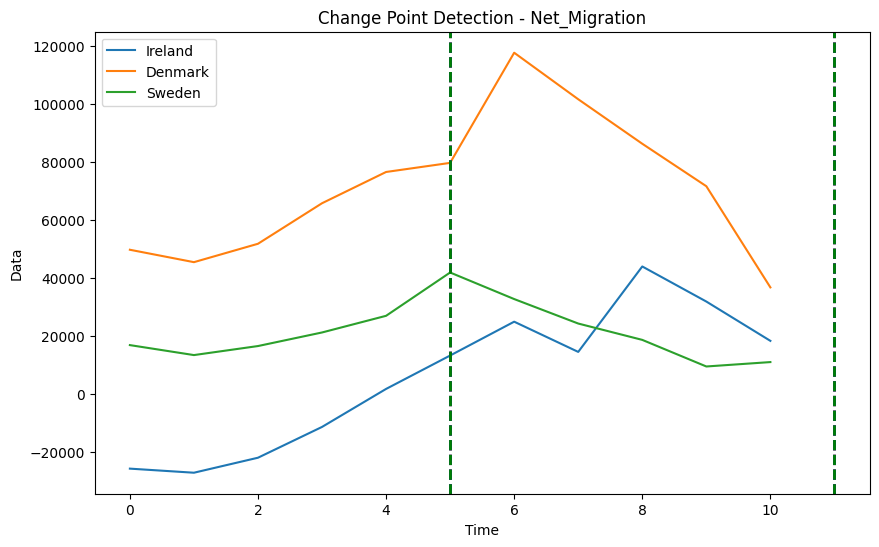

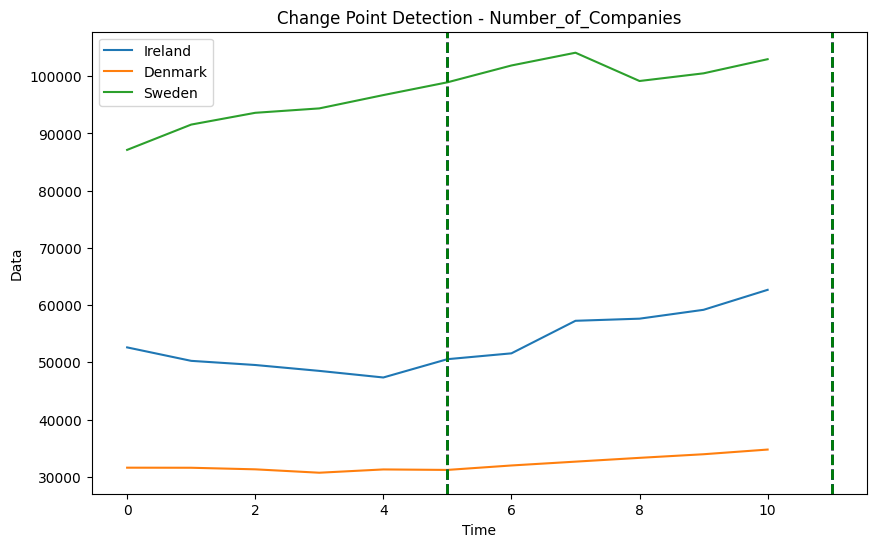

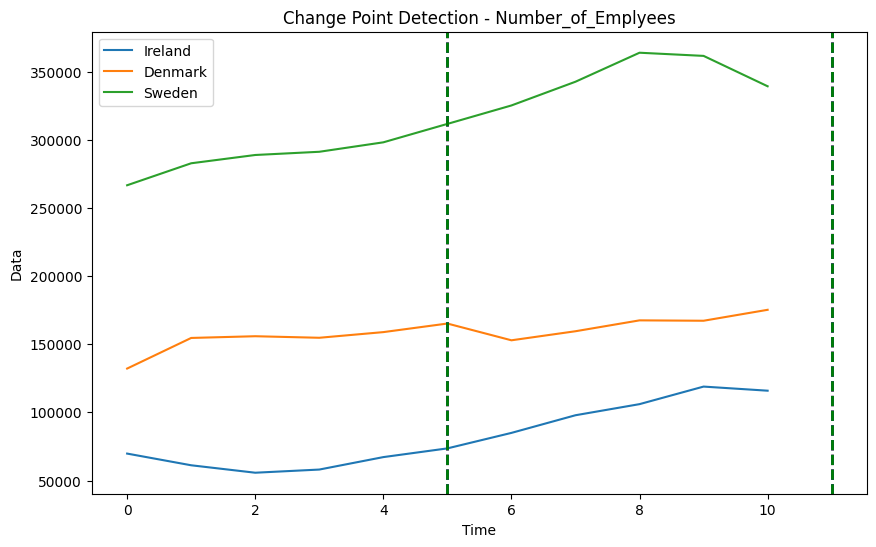

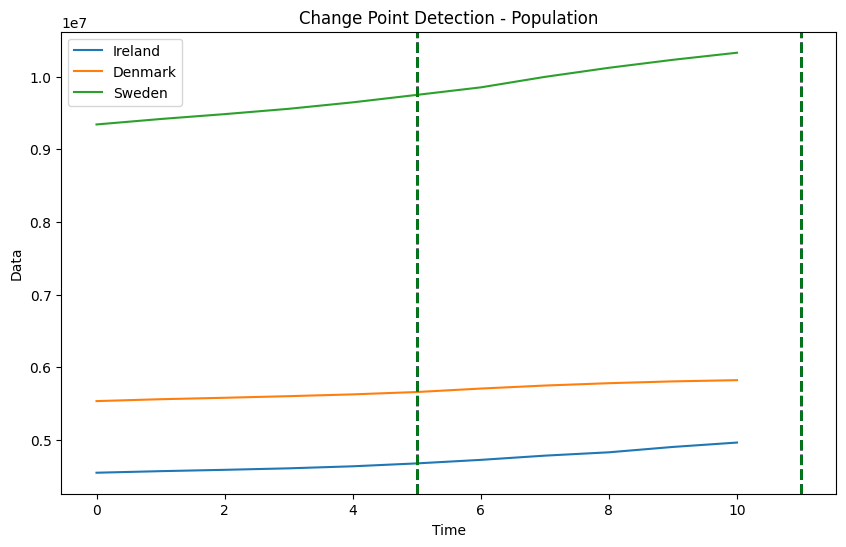

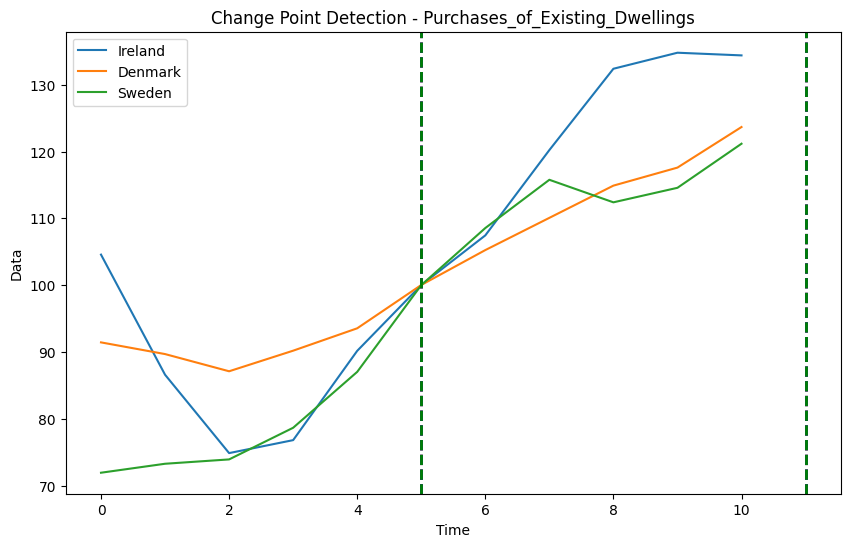

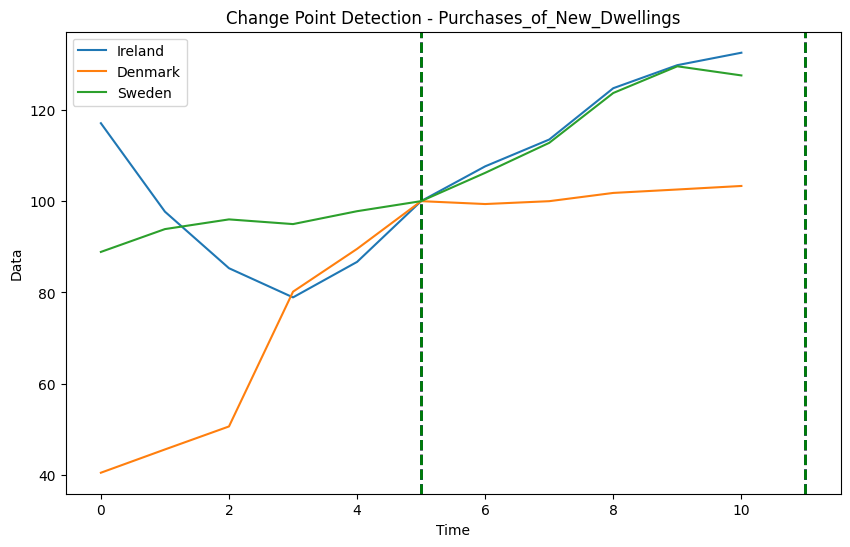

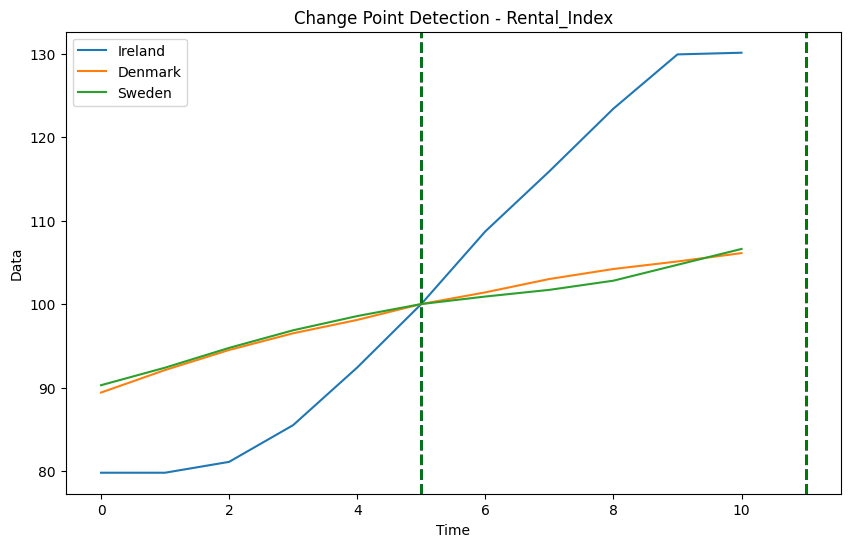

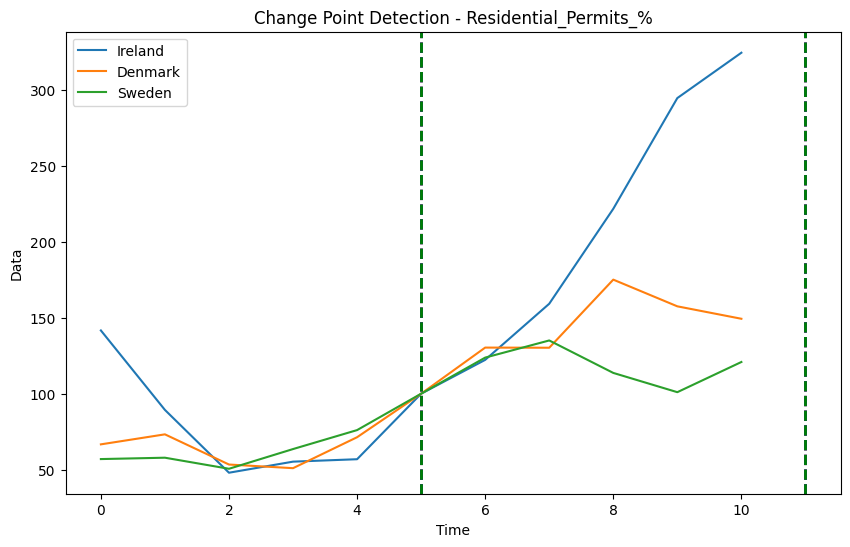

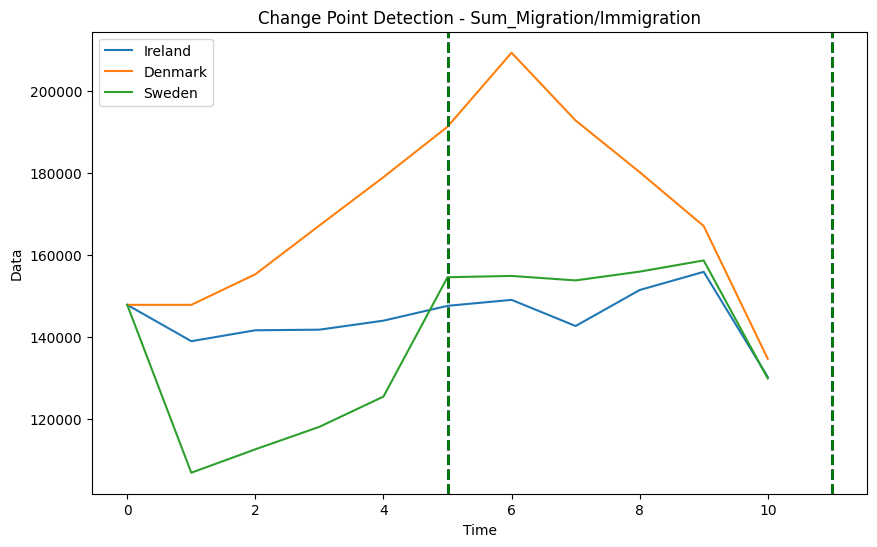

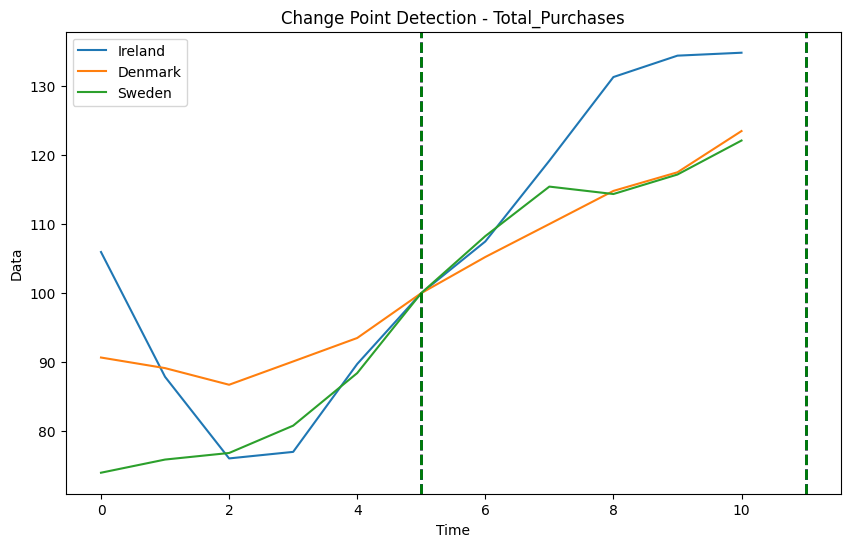

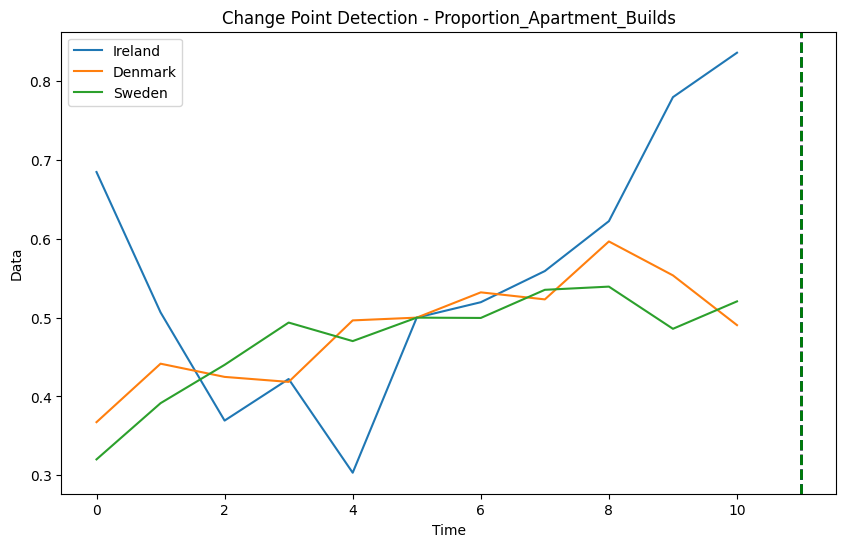

In [ ]:
# Filter the DataFrame for each country
df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_denmark = df_loc[df_loc['COUNTRY'] == 'DENMARK']
df_sweden = df_loc[df_loc['COUNTRY'] == 'SWEDEN']

# Iterate through each column for change point detection
for column_name in df_ireland.columns:
    if df_ireland[column_name].dtype != np.number:
        continue  # Skip non-numeric columns

    # Get the data for each country
    data_ireland = df_ireland[column_name].values
    data_denmark = df_denmark[column_name].values
    data_sweden = df_sweden[column_name].values

    # Perform change point detection using Pelt algorithm for each country
    model = "l2"  # l2-norm as the cost function

    # Ireland
    algo_ireland = rpt.Pelt(model=model).fit(data_ireland)
    result_ireland = algo_ireland.predict(pen=10)  # Change point prediction with penalty parameter

    # Denmark
    algo_denmark = rpt.Pelt(model=model).fit(data_denmark)
    result_denmark = algo_denmark.predict(pen=10)  

    # Sweden
    algo_sweden = rpt.Pelt(model=model).fit(data_sweden)
    result_sweden = algo_sweden.predict(pen=10)  

    # Plot the change points
    plt.figure(figsize=(10, 6))

    # Plot data and change points for each country
    plt.plot(data_ireland, label='Ireland')
    for cp in result_ireland:
        plt.axvline(x=cp, color='r', linestyle='--', linewidth=2)

    plt.plot(data_denmark, label='Denmark')
    for cp in result_denmark:
        plt.axvline(x=cp, color='b', linestyle='--', linewidth=2)

    plt.plot(data_sweden, label='Sweden')
    for cp in result_sweden:
        plt.axvline(x=cp, color='g', linestyle='--', linewidth=2)

    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.title(f'Change Point Detection - {column_name}')
    plt.legend()
    plt.show()


## Regression Analysis for the Impact of Various Factors on House Price Index

In [166]:
df_ireland.isnull().sum().sum()

2

In [165]:
df_ireland = df_loc[df_loc['Country'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits'] 
# Specifing the model
X = df_ireland[["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings']]
X = sm.add_constant(X)  # adding a constant
y = df_ireland["House_Price_Index"]

# Fitting the model
model = sm.OLS(y, X)
results = model.fit()

# results
print(results.summary())

<ipython-input-165-3427086095b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']


MissingDataError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
df_ireland = df_loc[df_loc['Country'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']


# Select columns to check for outliers
cols_to_check = ["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings', 'House_Price_Index']

# Compute Z-scores
z_scores = np.abs(stats.zscore(df_ireland[cols_to_check]))

# Define a threshold to identify outliers
threshold = 3

# Get a boolean mask where true values are outliers
outliers = (z_scores > threshold).any(axis=1)

# Get the dataframe with only non-outliers
df_no_outliers = df_ireland[~outliers]


<ipython-input-51-576548b38ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']


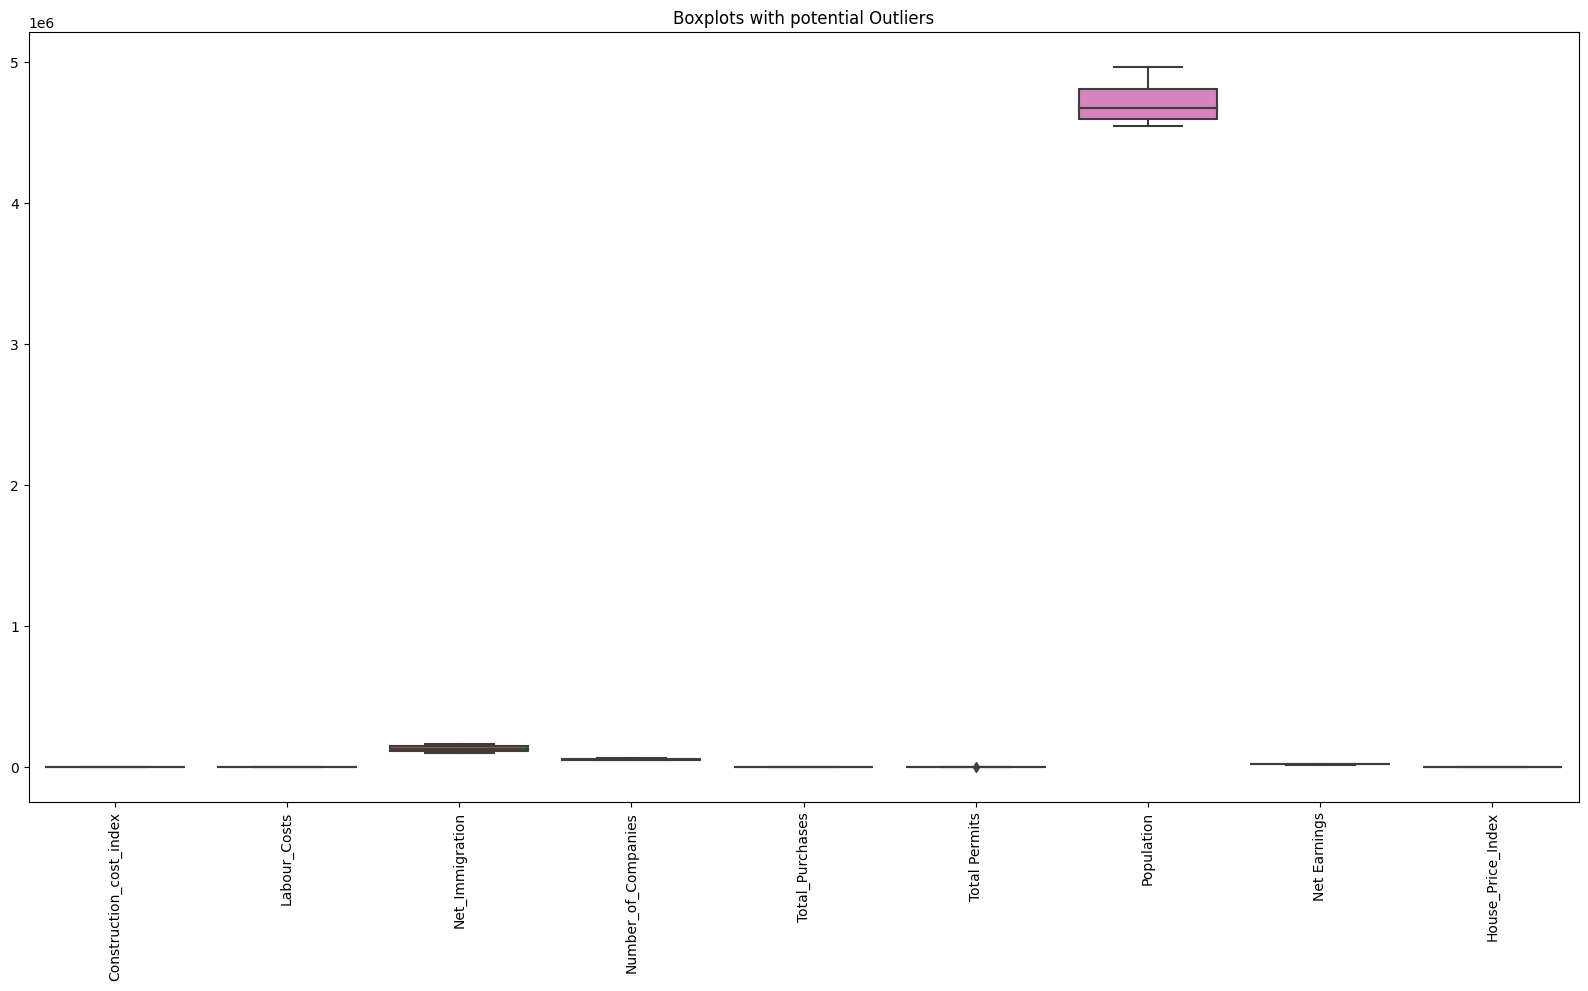

In [ ]:
# Plotting boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers[cols_to_check])
plt.xticks(rotation=90)
plt.title("Boxplots with potential Outliers")
plt.show()

In [ ]:
df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits'] 
# Specifing the model
X = df_ireland[["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings']]
X = sm.add_constant(X)  # adding a constant
y = df_ireland["House_Price_Index"]

# Fitting the model
model = sm.OLS(y, X)
results = model.fit()

# results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.005e+05
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.43e-06
Time:                        23:31:30   Log-Likelihood:                 33.232
No. Observations:                  11   AIC:                            -48.46
Df Residuals:                       2   BIC:                            -44.88
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<ipython-input-54-12edc906bdcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
df_ireland = df_loc[df_loc['COUNTRY'] == 'IRELAND']
df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits'] 
# Specifing the model
X = df_no_outliers[["Construction_cost_index", "Labour_Costs", "Net_Immigration", "Number_of_Companies", 'Total_Purchases','Total Permits', 'Population', 'Net Earnings']]
X = sm.add_constant(X)  # adding a constant
y = df_no_outliers["House_Price_Index"]

# Fitting the model
model = sm.OLS(y, X)
results = model.fit()

# results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.005e+05
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.43e-06
Time:                        23:31:54   Log-Likelihood:                 33.232
No. Observations:                  11   AIC:                            -48.46
Df Residuals:                       2   BIC:                            -44.88
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<ipython-input-55-beec1c996faa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ireland['Total Permits'] = df_ireland['1_dwelling_Permits']  + df_ireland['2+_dwelling_Permits']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
df_loc.columns

Index(['Date', 'COUNTRY', '1_dwelling_Permits', '2+_dwelling_Permits',
       'Construction_cost_index', 'Hours_Worked', 'House_Price_Index',
       'Labour_Costs', 'Net_Immigration', 'Net_Migration',
       'Number_of_Companies', 'Number_of_Emplyees', 'Population',
       'Purchases_of_Existing_Dwellings', 'Purchases_of_New_Dwellings',
       'Rental_Index', 'Residential_Permits_%', 'Sum_Migration/Immigration',
       'Total_Purchases', 'Proportion_Apartment_Builds'],
      dtype='object')

In [ ]:

data = df_loc
data.fillna(data.mean(), inplace=True)
# Select relevant features based on domain knowledge
relevant_features = ['Construction_cost_index', 'House_Price_Index', 'Population']
string_columns = ['Date', 'COUNTRY', 'House_Price_Index']
# Alternatively, use feature importance techniques (e.g., random forest feature importance)


# Separate the features and target variable
X = data.drop(columns=string_columns, axis=1)  # Features
y = data['House_Price_Index']  # Target variable

# Fit a random forest model to calculate feature importances
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Select top 'k' features with highest importance
k = 6
top_features_indices = feature_importances.argsort()[-k:][::-1]
top_features = X.columns[top_features_indices].tolist()
print(top_features_indices)
print(top_features)

[ 2 15  9 12  8  5]
['Construction_cost_index', 'Total_Purchases', 'Population', 'Rental_Index', 'Number_of_Emplyees', 'Net_Immigration']


<ipython-input-160-ea786f70d8d3>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:


# Assuming 'X' contains the top features and 'y' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regression models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
neural_network = MLPRegressor()

# Train the models
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
neural_network.fit(X_train, y_train)

# Make predictions on the test set
linear_pred = linear_regression.predict(X_test)
tree_pred = decision_tree.predict(X_test)
forest_pred = random_forest.predict(X_test)
boosting_pred = gradient_boosting.predict(X_test)
nn_pred = neural_network.predict(X_test)

# Evaluate model performance
linear_mse = mean_squared_error(y_test, linear_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
boosting_mse = mean_squared_error(y_test, boosting_pred)
nn_mse = mean_squared_error(y_test, nn_pred)

linear_r2 = r2_score(y_test, linear_pred)
tree_r2 = r2_score(y_test, tree_pred)
forest_r2 = r2_score(y_test, forest_pred)
boosting_r2 = r2_score(y_test, boosting_pred)
nn_r2 = r2_score(y_test, nn_pred)

# Print the performance metrics
print("Linear Regression - MSE: {:.4f}, R^2: {:.4f}".format(linear_mse, linear_r2))
print("Decision Tree - MSE: {:.4f}, R^2: {:.4f}".format(tree_mse, tree_r2))
print("Random Forest - MSE: {:.4f}, R^2: {:.4f}".format(forest_mse, forest_r2))
print("Gradient Boosting - MSE: {:.4f}, R^2: {:.4f}".format(boosting_mse, boosting_r2))
print("Neural Network - MSE: {:.4f}, R^2: {:.4f}".format(nn_mse, nn_r2))


Linear Regression - MSE: 1.3717, R^2: 0.9963
Decision Tree - MSE: 289.7402, R^2: 0.2186
Random Forest - MSE: 96.8137, R^2: 0.7389
Gradient Boosting - MSE: 63.5609, R^2: 0.8286
Neural Network - MSE: 44073239955.7276, R^2: -118855961.4683


In [ ]:
# Assuming you have selected the best regression model (e.g., random forest) and split the data into training and testing sets

# Fit the model on the training data
model.fit(X_train, y_train)

# Assuming you have trained the model and split the data into training and testing sets

# Make predictions on the test/validation data
y_pred = model.predict(X_test)

# Evaluate the model using appropriate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("R-squared (R^2): {:.4f}".format(r2))


Mean Squared Error (MSE): 106.9929
Root Mean Squared Error (RMSE): 10.3437
R-squared (R^2): 0.7115


In [168]:
df_loc.isnull().sum().sum()

6

'GDP' data for each country is normally distributed.

In [171]:
from scipy.stats import shapiro

for country in df_loc['Country'].unique():
    print(f"Shapiro-Wilk test for GDP in {country}:")
    country_data = df_loc[df_loc['Country'] == country]
    _, p_value = shapiro(country_data['GDP'])
    print(f"P-value: {p_value}\n")


Shapiro-Wilk test for GDP in DENMARK:
P-value: 0.30736038088798523

Shapiro-Wilk test for GDP in IRELAND:
P-value: 0.13514456152915955

Shapiro-Wilk test for GDP in SWEDEN:
P-value: 0.7310987710952759



In [138]:
df_ireland = df_loc[df_loc['Country'] == 'IRELAND']
df_denmark = df_loc[df_loc['Country'] == 'DENMARK']
df_sweden = df_loc[df_loc['Country'] == 'SWEDEN']

In [181]:
columns_to_keep = ['Construction_cost_index', 'House_Price_Index', 'Volume_of_Production', 'Labour_Costs', 'GDP construction', 'Population', 'Country', 'Date']
dfp = df_loc[columns_to_keep]

In [182]:
df_ireland = dfp[dfp['Country'] == 'IRELAND']
df_denmark = dfp[dfp['Country'] == 'DENMARK']
df_sweden = dfp[dfp['Country'] == 'SWEDEN']

In [183]:
df_ireland.describe()

Construction_cost_index  House_Price_Index  Volume_of_Production  \
count                11.000000          11.000000             11.000000   
mean                101.672727          99.826364            106.918182   
std                   4.189055          20.707417             24.020609   
min                  97.100000          71.760000             77.000000   
25%                  99.100000          83.795000             89.200000   
50%                 100.000000         100.000000            100.000000   
75%                 103.750000         118.150000            127.800000   
max                 109.400000         127.200000            144.800000   

       Labour_Costs  GDP construction    Population         Date  
count     11.000000         11.000000  1.100000e+01    11.000000  
mean     110.181818       6964.197091  4.713145e+06  2015.000000  
std       33.683344       3398.551214  1.409465e+05     3.316625  
min       72.400000       2271.456000  4.549428e+06  2010.000000  
25%       82.400000       4136.389500  4.599533e+06  2012.500000  
50%      100.100000       6495.720000  4.677627e+06  2015.000000  
75%      140.000000      10411.877000  4.807388e+06  2017.500000  
max      161.800000      11215.776000  4.964440e+06  2020.000000

In [ ]:
df_denmark.describe()

In [184]:
df_sweden.describe()

Construction_cost_index  House_Price_Index  Volume_of_Production  \
count                11.000000          11.000000             11.000000   
mean                101.236364         131.900000            103.572727   
std                   7.477603          25.402401             13.936434   
min                  90.300000         100.000000             87.000000   
25%                  96.200000         106.550000             92.400000   
50%                 100.000000         135.200000            100.000000   
75%                 106.950000         155.350000            117.900000   
max                 112.100000         165.100000            122.600000   

       Labour_Costs  GDP construction    Population         Date  
count     11.000000         11.000000  1.100000e+01    11.000000  
mean     101.218182      30866.350273  9.791946e+06  2015.000000  
std       19.371155       5682.240963  3.393679e+05     3.316625  
min       72.400000      22570.917000  9.340682e+06  2010.000000  
25%       87.200000      26529.394000  9.519374e+06  2012.500000  
50%      100.000000      30313.773000  9.747355e+06  2015.000000  
75%      116.200000      36003.705500  1.005770e+07  2017.500000  
max      130.100000      39742.068000  1.032759e+07  2020.000000

# STATISTIC TESTS

### Confidence interval

In [ ]:
import numpy as np
import scipy.stats
from tabulate import tabulate

def confidenceInterval(df, column):

    # Calculate the mean and standard deviation
    mean = np.mean(df[column])
    std_dev = np.std(df[column])

    # Calculate the standard error
    std_err = std_dev / np.sqrt(len(df[column]))

    # Compute the 95% confidence interval
    ci_lower, ci_upper = scipy.stats.norm.interval(0.95, loc=mean, scale=std_err)

    print(f"Mean: {mean}, Standard Deviation: {std_dev}, Standard Error: {std_err}, Confidence Interval (Lower): {ci_lower}, Confidence Interval (Upper): {ci_upper}")


In [ ]:
confidenceInterval(df_ireland, 'Volume_of_Production')

Mean: 103.57272727272726, Standard Deviation: 13.287868076427042, Standard Error: 4.006442970295459, Confidence Interval (Lower): 95.72024334483449, Confidence Interval (Upper): 111.42521120062004


In [ ]:
confidenceInterval(df_sweden, 'Volume_of_Production')

Mean: 103.57272727272726, Standard Deviation: 13.287868076427042, Standard Error: 4.006442970295459, Confidence Interval (Lower): 95.72024334483449, Confidence Interval (Upper): 111.42521120062004


In [ ]:
confidenceInterval(df_denmark, 'Volume_of_Production')

Mean: 101.74545454545455, Standard Deviation: 10.05045124598562, Standard Error: 3.030325068790384, Confidence Interval (Lower): 95.80612654917654, Confidence Interval (Upper): 107.68478254173256


## Check Normality 

In [125]:
from scipy.stats import shapiro

#Shapiro-Wilk test

def isNormal(df, column):
 
  W, p = shapiro(df[column])

  print('W = %.3f, p = %.3f' % (W, p))

  # interpret
  alpha = 0.05
  if p > alpha:
      print('Sample looks Gaussian (Normal) (fail to reject H0)')
  else:
      print('Sample does not look Gaussian (Normal) (reject H0)')


In [191]:
def check_normality(df):
    df = df.select_dtypes(include=[np.number])  # Only use numeric columns
    results = []
    for column in df.columns:
        W, p = shapiro(df[column])
        alpha = 0.05
        if p > alpha:
            result = 'Normal'
        else:
            result = 'Not Normal'
        results.append([column, W, p, result])
    result_df = pd.DataFrame(results, columns=['Column', 'W-Statistic', 'p-value', 'Normality'])
    print(result_df)


In [192]:
check_normality(df_ireland)

                    Column  W-Statistic   p-value   Normality
0  Construction_cost_index     0.848542  0.040848  Not Normal
1        House_Price_Index     0.917411  0.297665      Normal
2     Volume_of_Production     0.925927  0.371135      Normal
3             Labour_Costs     0.888097  0.131649      Normal
4         GDP construction     0.902541  0.198494      Normal
5               Population     0.924717  0.359902      Normal
6                     Date     0.968391  0.869842      Normal


In [193]:
check_normality(df_sweden)

                    Column  W-Statistic   p-value Normality
0  Construction_cost_index     0.944983  0.580723    Normal
1        House_Price_Index     0.874693  0.089041    Normal
2     Volume_of_Production     0.857637  0.053657    Normal
3             Labour_Costs     0.959925  0.770755    Normal
4         GDP construction     0.946987  0.605735    Normal
5               Population     0.946579  0.600613    Normal
6                     Date     0.968391  0.869842    Normal


In [194]:
check_normality(df_denmark)

                    Column  W-Statistic   p-value Normality
0  Construction_cost_index     0.954176  0.697578    Normal
1        House_Price_Index     0.910006  0.243936    Normal
2     Volume_of_Production     0.906256  0.220073    Normal
3             Labour_Costs     0.926682  0.378273    Normal
4         GDP construction     0.860598  0.058619    Normal
5               Population     0.931587  0.427132    Normal
6                     Date     0.968391  0.869842    Normal


## Test For Normality


In [195]:
isNormal(df_ireland, ['Construction_cost_index'])

W = 0.849, p = 0.041
Sample does not look Gaussian (Normal) (reject H0)


In [117]:
isNormal(df_sweden, ['Construction_cost_index'])

Statistics=0.945, p=0.581
Sample looks Gaussian (Normal) (fail to reject H0)


In [115]:
isNormal(df_denmark, ['Construction_cost_index'])

Statistics=0.954, p=0.698
Sample looks Gaussian (Normal) (fail to reject H0)


Q-Q plot (MISSING A PLOT HERE!!) .TODO

## Test for equal variances

levene test

In [134]:
from scipy.stats import levene

def homogeneity(df, df2, column):
  W, p = levene(df[column], df2[column])

  print('W = %.3f, p = %.3f' % (W, p))
  if p > 0.05:
      print("Sample looks to have equal variances (fail to reject H0)")
  else:
      print("Sample does not look to have equal variances (reject H0)")


In [135]:
homogeneity(df_ireland, df_denmark, 'Labour_Costs')

W = 6.397, p = 0.020
Sample does not look to have equal variances (reject H0)


In [136]:
homogeneity(df_ireland, df_sweden, 'Labour_Costs')

W = 3.504, p = 0.076
Sample looks to have equal variances (fail to reject H0)


In [137]:
homogeneity(df_sweden, df_denmark, 'Labour_Costs')

W = 1.190, p = 0.288
Sample looks to have equal variances (fail to reject H0)


Plot

In [129]:
def plotLevene():
    # Create a list of data for each group
    data = [df_denmark['Labour_Costs'], df_sweden['Labour_Costs'], df_ireland['Labour_Costs']]
    l = ['denmark', 'sweden', 'ireland']
    # Create the box plot
    plt.boxplot(data, labels=['denmark', 'sweden', 'ireland'])

    # Set plot title and labels
    plt.title('Levene Test Results')
    plt.xlabel('Groups')
    plt.ylabel(l)

    # Display the plot
    plt.show()

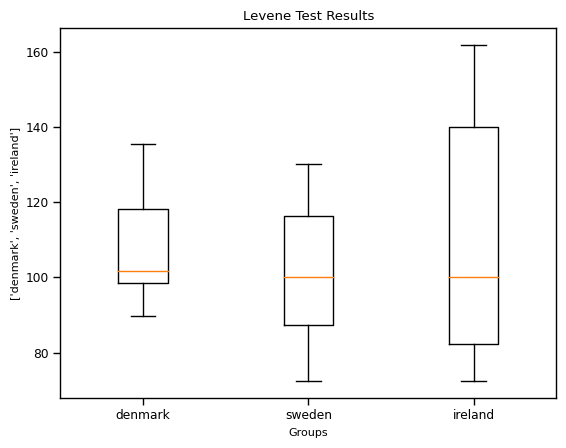

In [130]:
plotLevene()

In [72]:
df_ireland.columns

Index(['Construction_cost_index', 'House_Price_Index', 'Volume_of_Production',
       'Labour_Costs', 'GDP construction', 'Population', 'Country', 'Date'],
      dtype='object')

## Test for differences

### ANOVA test

In [144]:
isNormal(df_ireland, ['Number_of_Companies'])

W = 0.913, p = 0.264
Sample looks Gaussian (Normal) (fail to reject H0)


In [143]:
isNormal(df_sweden, ['Number_of_Companies'])

W = 0.956, p = 0.724
Sample looks Gaussian (Normal) (fail to reject H0)


In [142]:
isNormal(df_denmark, ['Number_of_Companies'])

W = 0.891, p = 0.141
Sample looks Gaussian (Normal) (fail to reject H0)


In [159]:
from scipy.stats import f_oneway

def testDifferencesNormal(d1, d2, d3, column):
  _, p_value = f_oneway(d1[column], d2[column], d3[column])
  print("ANOVA P-value:", p_value)

  alpha = 0.05  # significance level

  if p_value < alpha:
      print("Reject the null hypothesis.")
  else:
      print("Fail to reject the null hypothesis.")



In [160]:
testDifferencesNormal(df_ireland, df_sweden, df_denmark, 'Number_of_Companies')

ANOVA P-value: 1.183835619219785e-25
Reject the null hypothesis.


 Strong evidence to suggest that there is a statistically significant difference in the number of companies among the three countries. 

Visualize

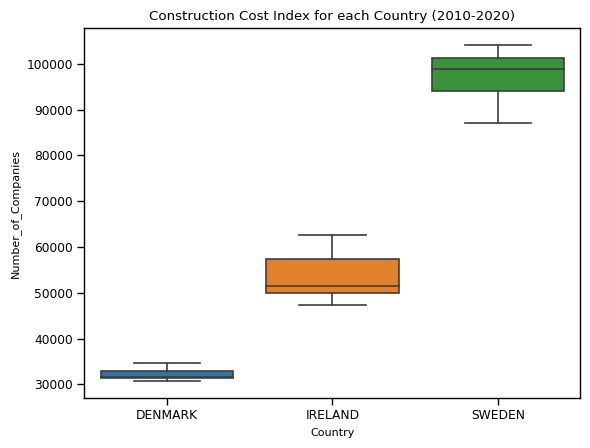

In [180]:
sns.boxplot(x='Country', y='Number_of_Companies', data=df_loc)
plt.title('Construction Cost Index for each Country (2010-2020)')
plt.show()

### Kruskal-Wallis test

In [161]:
from scipy.stats import kruskal

def testDifferences(d1, d2, d3, column):
    _, p_value = kruskal(d1[column], d2[column], d3[column])
    print("Kruskal-Wallis P-value:", p_value)

    alpha = 0.05  # significance level

    if p_value < alpha:
        print("Reject the null hypothesis.")
    else:
        print("Fail to reject the null hypothesis.")

In [162]:
testDifferences(df_ireland, df_sweden, df_denmark, 'Construction_cost_index')

Kruskal-Wallis P-value: 0.6491250297680224
Fail to reject the null hypothesis.


There is not enough evidence to conclude that there is a statistically significant difference in the construction cost index among the three countries. 

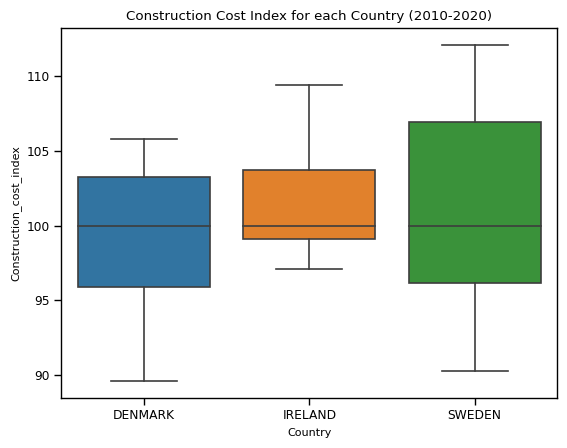

In [179]:
sns.boxplot(x='Country', y='Construction_cost_index', data=df_loc)
plt.title('Construction Cost Index for each Country (2010-2020)')
plt.show()

# ANother Thing

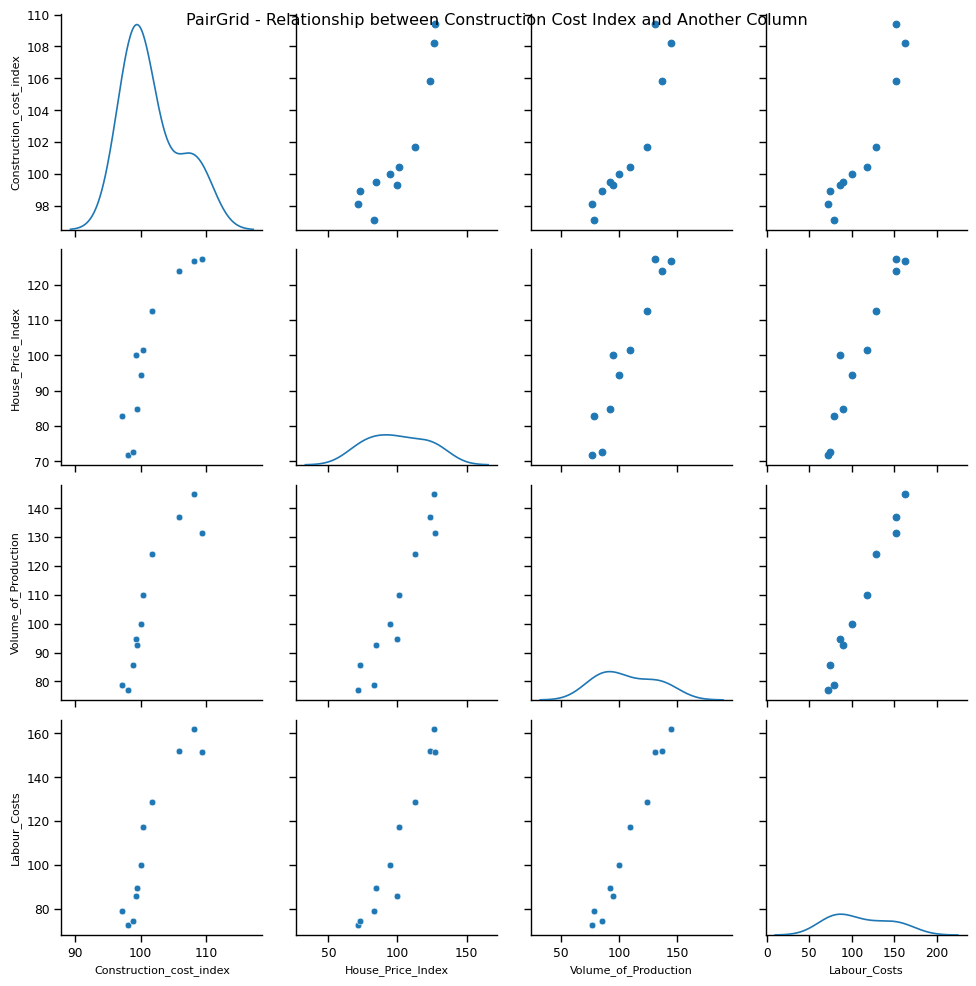

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a PairGrid
grid = sns.PairGrid(df_ireland, vars=['Construction_cost_index', 'House_Price_Index', 'Volume_of_Production', 'Labour_Costs'])

# Specify scatter plot for the upper triangle
grid.map_upper(plt.scatter)

# Specify kernel density plot for the diagonal
grid.map_diag(sns.kdeplot)

# Specify correlation plot for the lower triangle
grid.map_lower(sns.scatterplot)

# Add a title to the plot
grid.fig.suptitle('PairGrid - Relationship between Construction Cost Index and Another Column')

# Display the plot
plt.show()



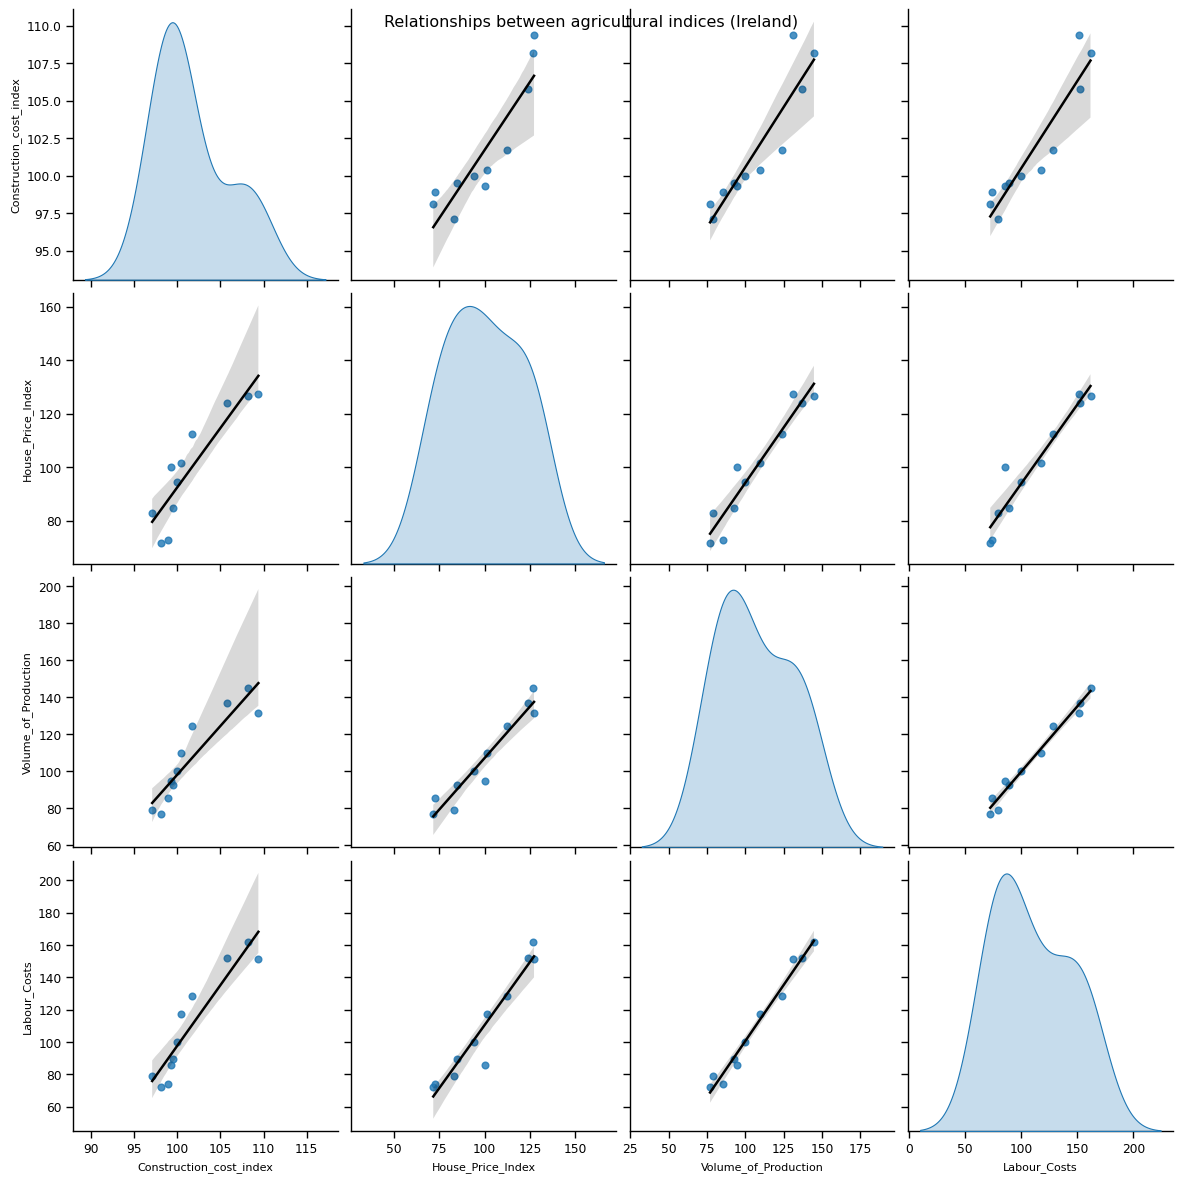

In [164]:
sns.set_context("paper", rc={"axes.labelsize":8})
metrics = ['Construction_cost_index', 'House_Price_Index', 'Volume_of_Production', 'Labour_Costs']

g = sns.pairplot(df_ireland[metrics], kind='reg', diag_kind='kde', height=3,
                 plot_kws={'line_kws': {'color': 'black'}})
#g.map_lower(r_squared)
g.fig.suptitle("Relationships between agricultural indices (Ireland)")
plt.xticks(rotation = 90)
plt.show()

In [165]:
df_ireland['Construction_cost_index']
df_sweden['Construction_cost_index']
df_denmark['Construction_cost_index']

0      89.6
3      92.8
6      95.2
9      96.6
12     98.1
15    100.0
18    101.6
21    102.4
24    104.2
27    105.0
30    105.8
Name: Construction_cost_index, dtype: float64

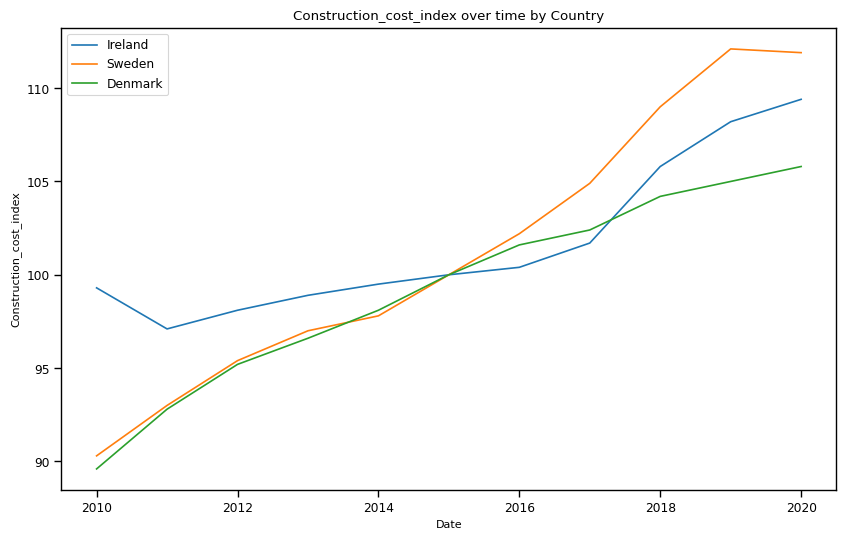

<Figure size 640x480 with 0 Axes>

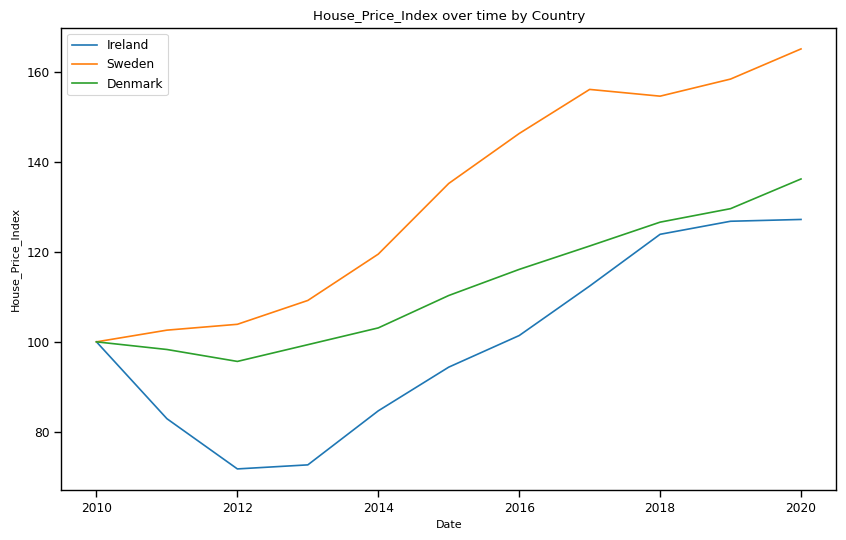

<Figure size 640x480 with 0 Axes>

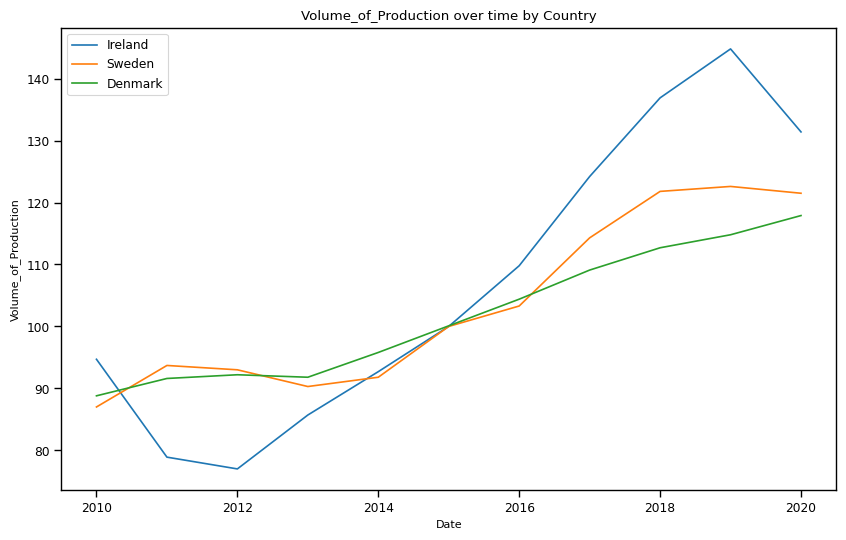

<Figure size 640x480 with 0 Axes>

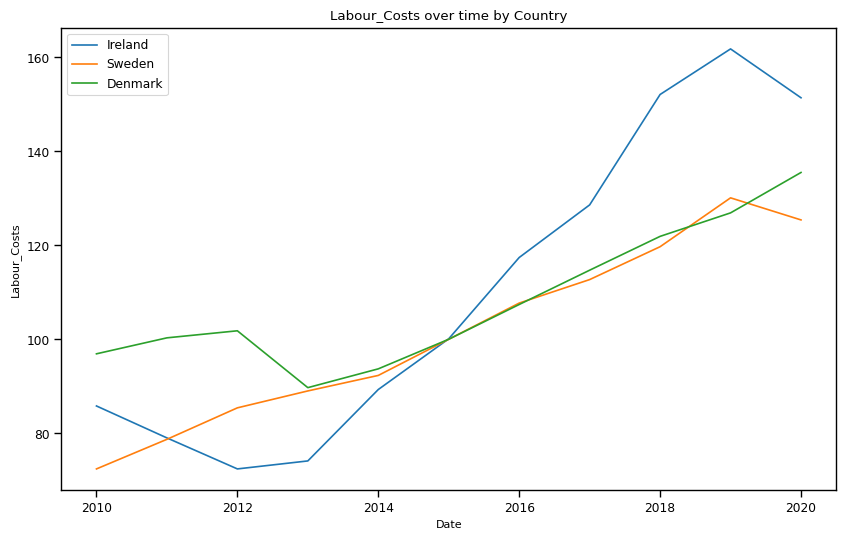

<Figure size 640x480 with 0 Axes>

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


metrics = ['Construction_cost_index', 'House_Price_Index', 'Volume_of_Production', 'Labour_Costs']

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df_ireland, x='Date', y=metric, label='Ireland')
    sns.lineplot(data=df_sweden, x='Date', y=metric, label='Sweden')
    sns.lineplot(data=df_denmark, x='Date', y=metric, label='Denmark')
    title= f'{metric} over time by Country'
    plt.title(title)
    plt.legend()
    plt.show()
    plt.savefig(f'{title}.png')



In [167]:
import numpy as np

df_ireland_construction_cost_index = np.array([ 99.3,  97.1,  98.1,  98.9,  99.5, 100.,  100.4, 101.7, 105.8, 108.2, 109.4])
df_sweden_construction_cost_index = np.array([ 90.3,  93.,   95.4,  97.,   97.8, 100.,  102.2, 104.9, 109.,  112.1, 111.9])
df_denmark_construction_cost_index = np.array([ 89.6,  92.8,  95.2,  96.6,  98.1, 100.,  101.6, 102.4, 104.2, 105.,  105.8])

mean_ireland = np.mean(df_ireland_construction_cost_index)
mean_sweden = np.mean(df_sweden_construction_cost_index)
mean_denmark = np.mean(df_denmark_construction_cost_index)

std_ireland = np.std(df_ireland_construction_cost_index)
std_sweden = np.std(df_sweden_construction_cost_index)
std_denmark = np.std(df_denmark_construction_cost_index)

print(f"Ireland: Mean={mean_ireland}, Std={std_ireland}")
print(f"Sweden: Mean={mean_sweden}, Std={std_sweden}")
print(f"Denmark: Mean={mean_denmark}, Std={std_denmark}")


Ireland: Mean=101.67272727272729, Std=3.9941072296551434
Sweden: Mean=101.23636363636365, Std=7.129614643069967
Denmark: Mean=99.2090909090909, Std=5.008439159051188
